In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing

### Reading Excel File

In [55]:
df = pd.read_excel("2G_Overshooting.xlsx")
df.head()

,BSC Source,BTS Name,Region,Source Cell Name,LAT,LONG,Target Cell Name,LAT.1,LONG.1,Co Site?,Total HO Request per cell,Distance (Km),MAX Distance(Km),MAX Distance*1.3,Matched TP,BTS Name.1,Region.1
0,NaN,NM156,Middle West,NM156B,32.380081,15.107797,NM05C,32.379893,15.114147,No,2428,0.596668,0.683643,0.888736,MRs(TA0 : TA3),NM156,Middle West
1,NaN,NM156,Middle West,NM156B,32.380081,15.107797,NM69A,32.376202,15.106301,No,2211,0.453627,0.683643,0.888736,MRs(TA0 : TA3),NM156,Middle West
2,NaN,NM156,Middle West,NM156B,32.380081,15.107797,NM05B,32.379893,15.114147,No,1968,0.596668,0.683643,0.888736,MRs(TA0 : TA3),NM156,Middle West
3,NaN,NM156,Middle West,NM156B,32.380081,15.107797,NM69B,32.376202,15.106301,No,1618,0.453627,0.683643,0.888736,MRs(TA0 : TA3),NM156,Middle West
4,NaN,NM156,Middle West,NM156B,32.380081,15.107797,NM69C,32.376202,15.106301,No,709,0.453627,0.683643,0.888736,MRs(TA0 : TA3),NM156,Middle West


## First Sheet Exploratory Data Analysis
* 2G Overshooting Analysis (TOP 6 NBRS)

LAT (Latitude):
Latitude provides the geographical position of the cell, which is crucial for calculating distances and determining the cell's location on the Earth's surface.

LONG (Longitude):
Similar to latitude, longitude provides the geographical position of the cell and is used for calculating distances.

Target Cell Name:
Identifies the specific cell that is being analyzed in relation to overshooting.

Co Site?:
Colocation information is important for understanding the physical proximity of cells, which can impact overshooting.

Total HO Request per cell (Total Handover Requests per cell):
Reflects the cell's handover dynamics, which can be indicative of network activity and potential overshooting.

Distance (Km):
Provides a direct measure of the physical distance between cells, a critical factor in assessing potential overshooting.

MAX Distance (Km):
This threshold distance is important for determining whether the actual distance exceeds acceptable limits, indicating potential overshooting.

MAX Distance*1.3:
This modified threshold may represent a safety margin or adjusted limit for overshooting analysis.

Matched TP (Transmission Points):
Matching transmission points can impact network interference and signal quality, contributing to overshooting analysis.

In [56]:
df = df.drop(["BSC Source", "BTS Name","Region","Source Cell Name","BTS Name.1","Region.1"], axis=1)
df.head()

,LAT,LONG,Target Cell Name,LAT.1,LONG.1,Co Site?,Total HO Request per cell,Distance (Km),MAX Distance(Km),MAX Distance*1.3,Matched TP
0,32.380081,15.107797,NM05C,32.379893,15.114147,No,2428,0.596668,0.683643,0.888736,MRs(TA0 : TA3)
1,32.380081,15.107797,NM69A,32.376202,15.106301,No,2211,0.453627,0.683643,0.888736,MRs(TA0 : TA3)
2,32.380081,15.107797,NM05B,32.379893,15.114147,No,1968,0.596668,0.683643,0.888736,MRs(TA0 : TA3)
3,32.380081,15.107797,NM69B,32.376202,15.106301,No,1618,0.453627,0.683643,0.888736,MRs(TA0 : TA3)
4,32.380081,15.107797,NM69C,32.376202,15.106301,No,709,0.453627,0.683643,0.888736,MRs(TA0 : TA3)


### Column Types

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6459 entries, 0 to 6458
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LAT                        6452 non-null   float64
 1   LONG                       6452 non-null   float64
 2   Target Cell Name           6459 non-null   object 
 3   LAT.1                      6454 non-null   float64
 4   LONG.1                     6454 non-null   float64
 5   Co Site?                   6459 non-null   object 
 6   Total HO Request per cell  6459 non-null   int64  
 7   Distance (Km)              6459 non-null   float64
 8   MAX Distance(Km)           6459 non-null   float64
 9   MAX Distance*1.3           6459 non-null   float64
 10  Matched TP                 6459 non-null   object 
dtypes: float64(7), int64(1), object(3)
memory usage: 555.2+ KB


### Statistical Overview

In [58]:
df.describe()

,LAT,LONG,LAT.1,LONG.1,Total HO Request per cell,Distance (Km),MAX Distance(Km),MAX Distance*1.3
count,6452.000000,6452.000000,6454.000000,6454.000000,6459.000000,6459.000000,6459.000000,6459.000000
mean,32.104174,14.992691,32.104290,14.993943,3988.531816,3.479612,5.609708,7.292621
std,0.845339,0.713574,0.847012,0.715631,5355.080210,4.440496,6.371951,8.283536
min,28.969200,13.801482,28.969200,13.681088,0.000000,0.401815,0.683643,0.888736
25%,32.329167,14.507947,32.332500,14.507947,709.000000,1.029529,1.739716,2.261630
50%,32.376675,15.045037,32.376750,15.046440,2046.000000,1.809252,3.085609,4.011292
75%,32.475197,15.131800,32.475197,15.132202,5019.500000,3.923274,7.316854,9.511911
max,32.752892,17.021425,32.757355,17.149972,45073.000000,107.055334,107.055334,139.171934


### Null Values in each column

In [59]:
df.isnull().sum()

LAT                          7
LONG                         7
Target Cell Name             0
LAT.1                        5
LONG.1                       5
Co Site?                     0
Total HO Request per cell    0
Distance (Km)                0
MAX Distance(Km)             0
MAX Distance*1.3             0
Matched TP                   0
dtype: int64

### Data Distribution

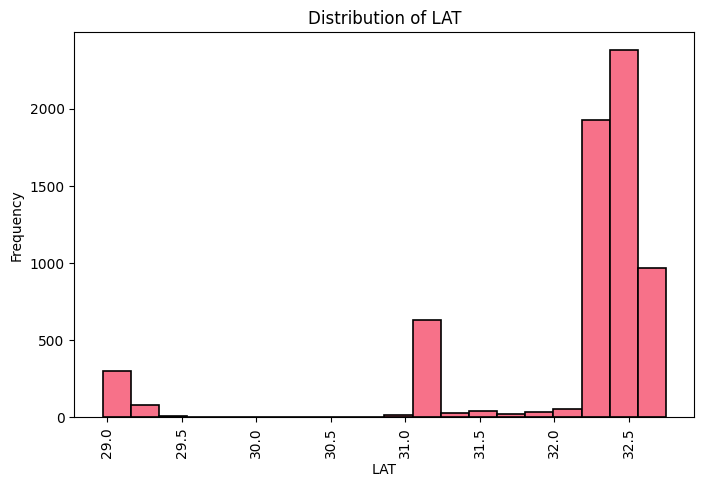

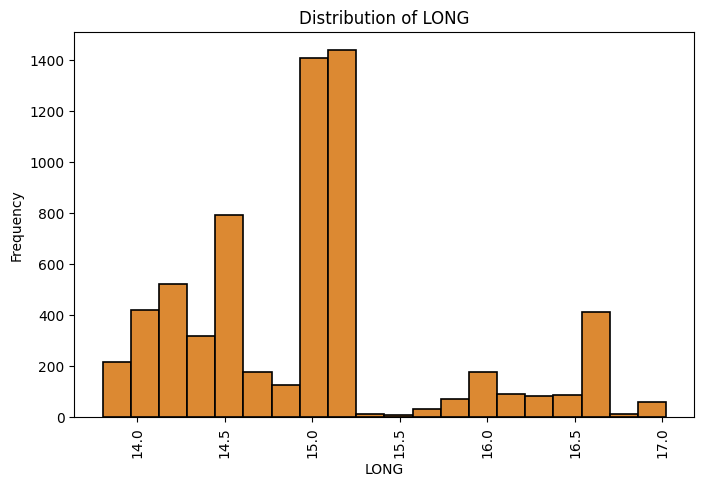

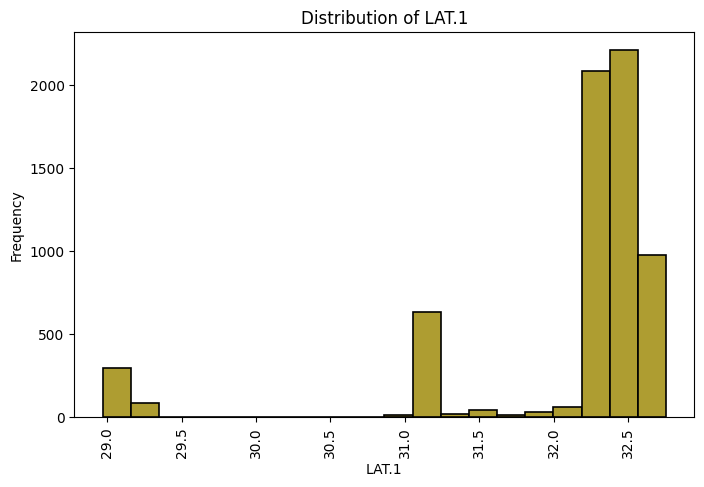

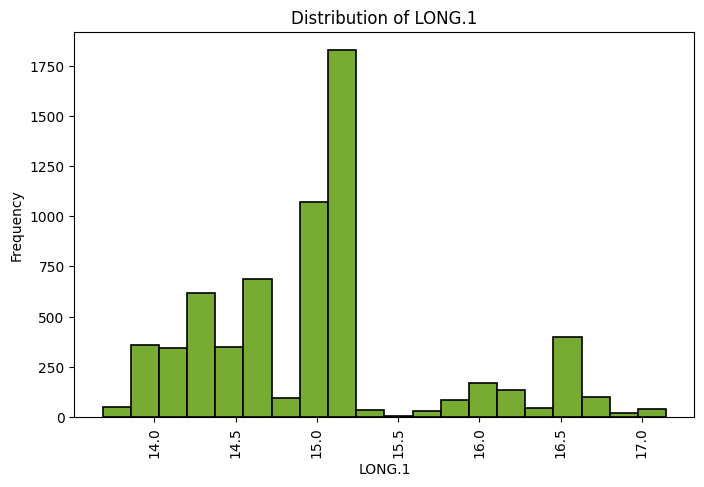

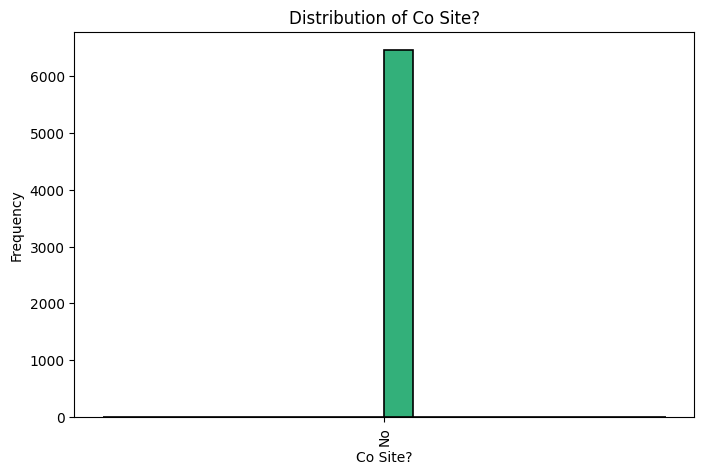

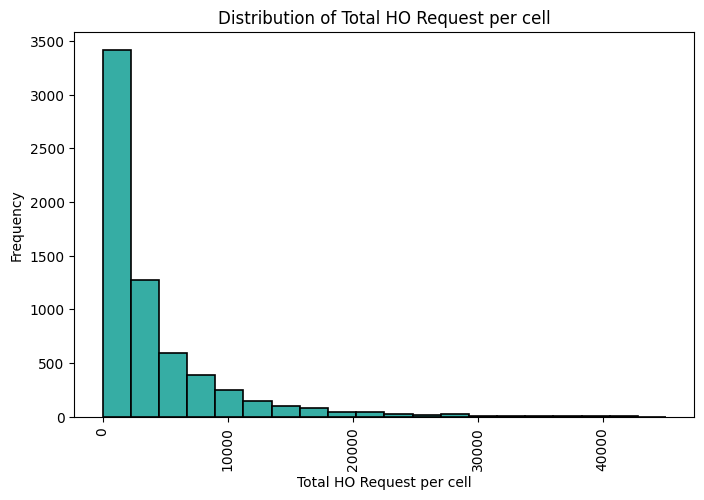

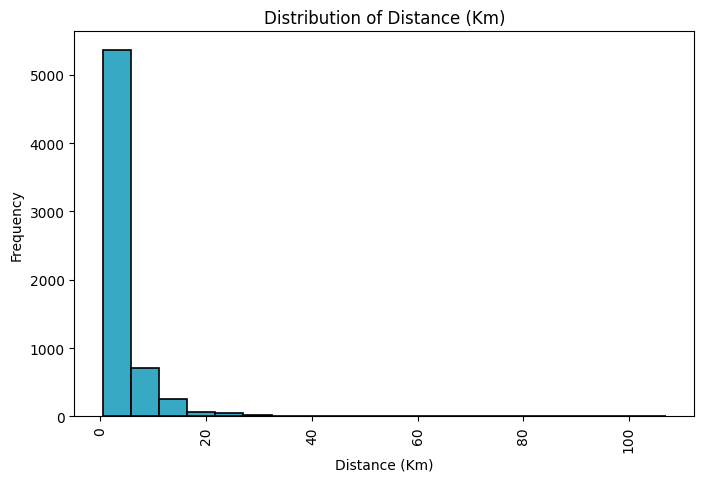

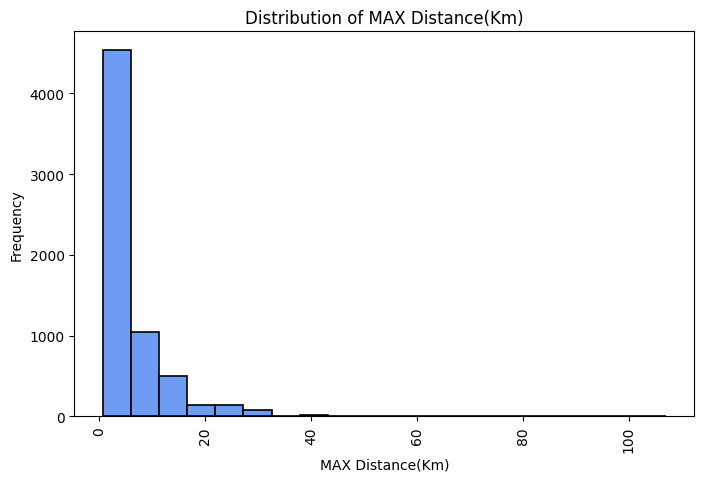

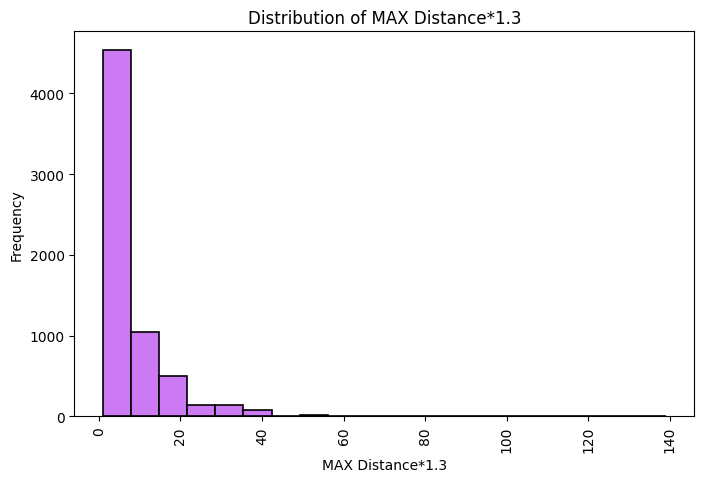

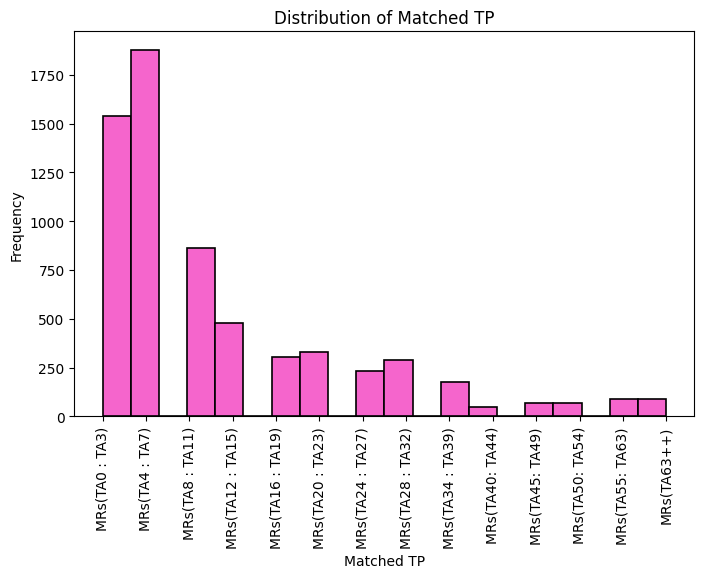

In [60]:
colors = sns.color_palette("husl", len(df.columns.drop('Target Cell Name')))
for i, col in enumerate(df.columns.drop('Target Cell Name')):
    plt.figure(figsize=(8, 5))
    plt.hist(df[col], bins=20, color=colors[i], edgecolor='black', linewidth=1.2)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()

### Extracting the Numerical Features (Columns)

In [61]:
numerical_features = df.select_dtypes(include=['float64','int64'])
numerical_features

,LAT,LONG,LAT.1,LONG.1,Total HO Request per cell,Distance (Km),MAX Distance(Km),MAX Distance*1.3
0,32.380081,15.107797,32.379893,15.114147,2428,0.596668,0.683643,0.888736
1,32.380081,15.107797,32.376202,15.106301,2211,0.453627,0.683643,0.888736
2,32.380081,15.107797,32.379893,15.114147,1968,0.596668,0.683643,0.888736
3,32.380081,15.107797,32.376202,15.106301,1618,0.453627,0.683643,0.888736
4,32.380081,15.107797,32.376202,15.106301,709,0.453627,0.683643,0.888736
...,...,...,...,...,...,...,...,...
6454,31.668574,15.110294,32.020274,15.045037,3,39.590060,39.590060,51.467079
6455,31.363373,15.241681,31.455800,15.245370,325,10.283374,107.055334,139.171934
6456,31.363373,15.241681,31.077700,16.316800,5,107.055334,107.055334,139.171934
6457,31.363373,15.241681,31.455800,15.245370,4,10.283374,107.055334,139.171934


### Displaying Correlations between features (Dependencies between columns)

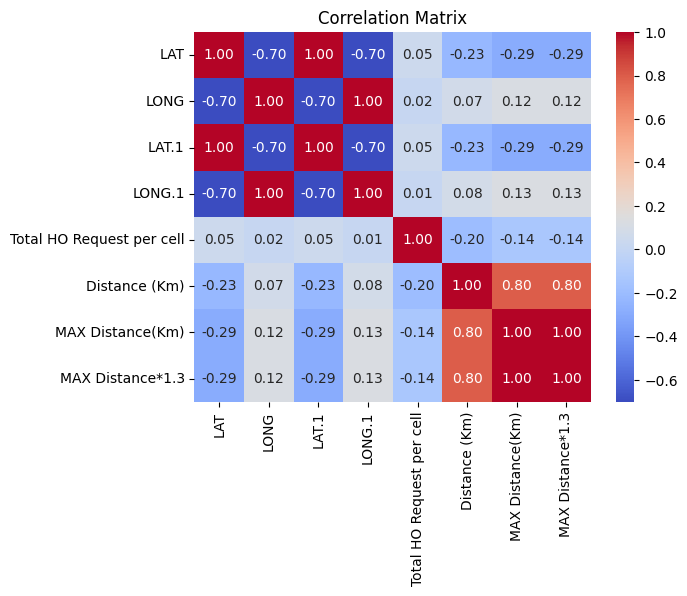

In [62]:
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### A function that displays the distribution of numerical values

In [63]:
def bins_cols(col):
    plot = sns.displot(data=df, x=col, kde=False, bins=100, color="blue", facecolor="pink", height=5, aspect=3.5)
    ax = plot.axes[0, 0]
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    plt.show()

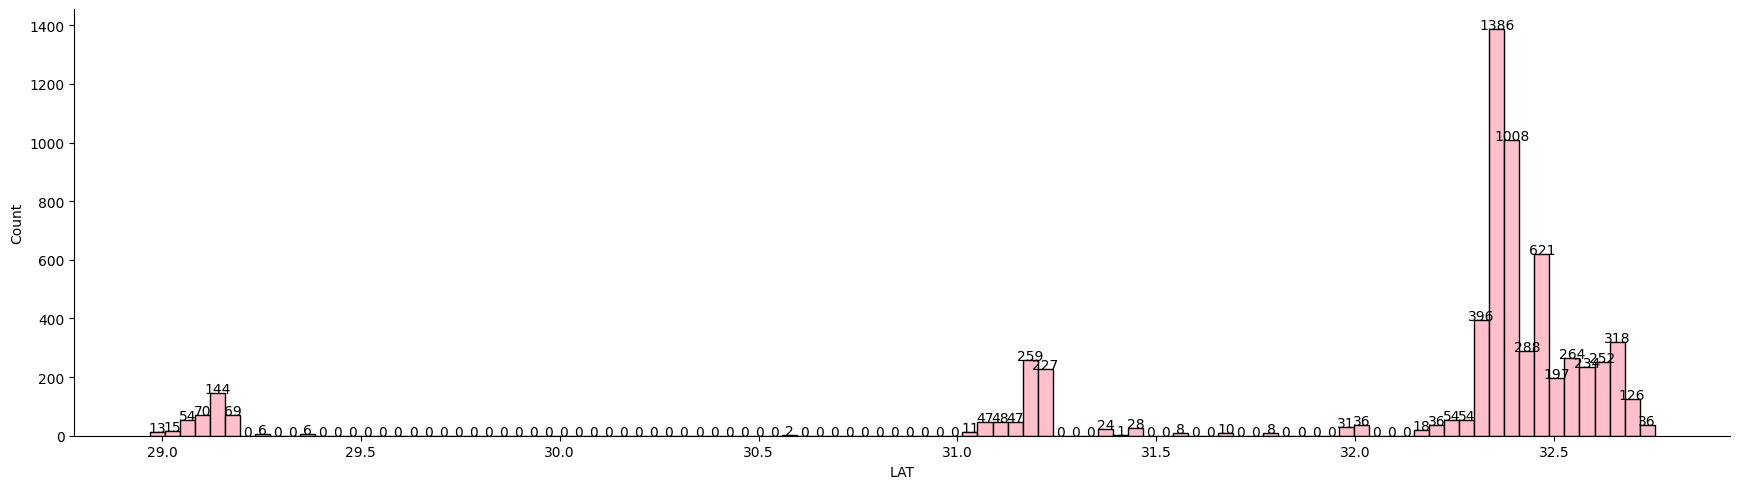

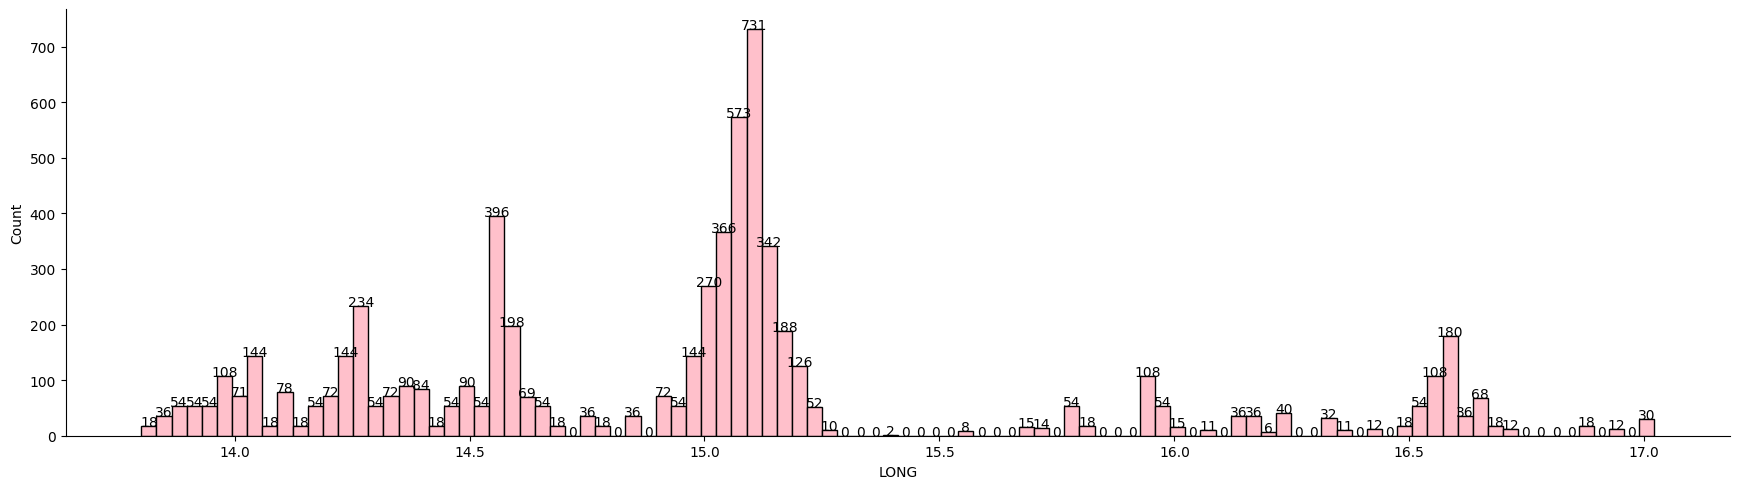

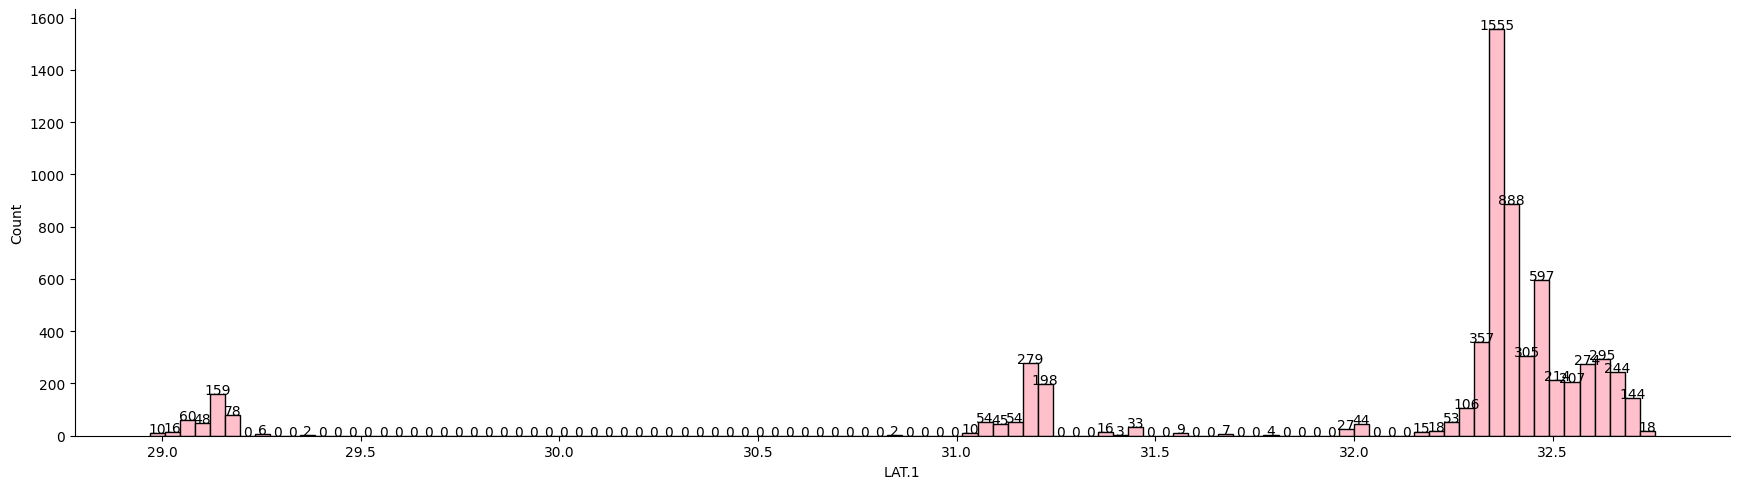

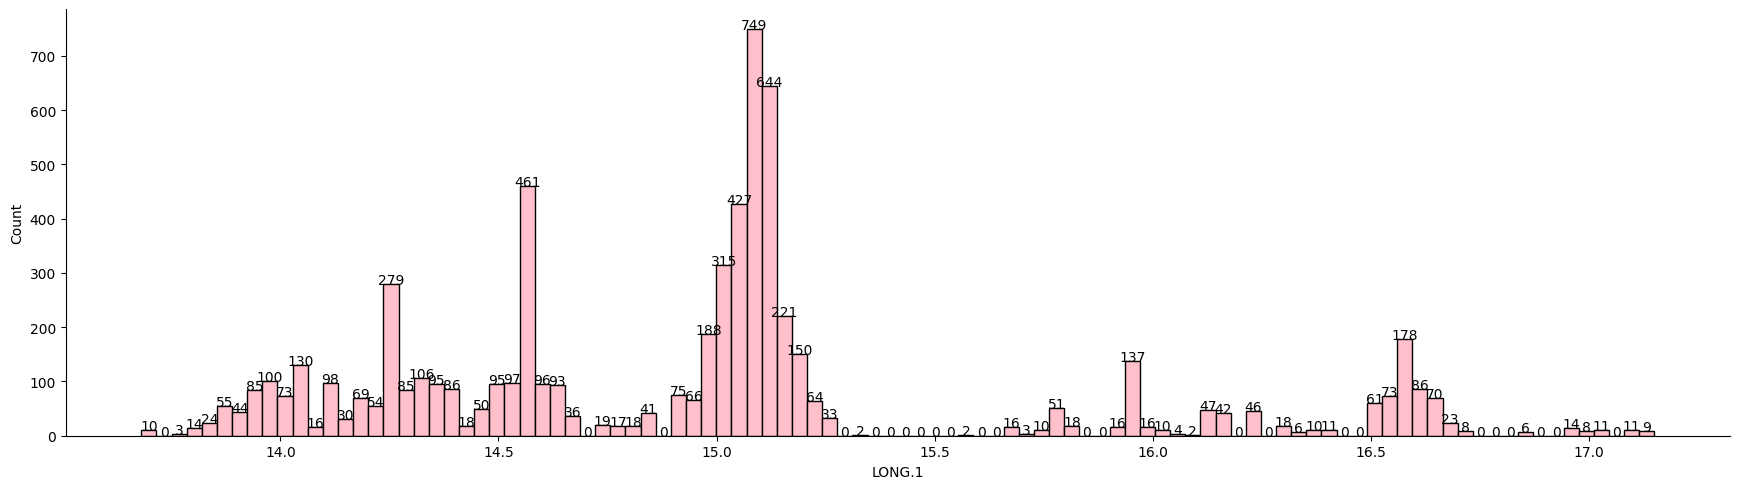

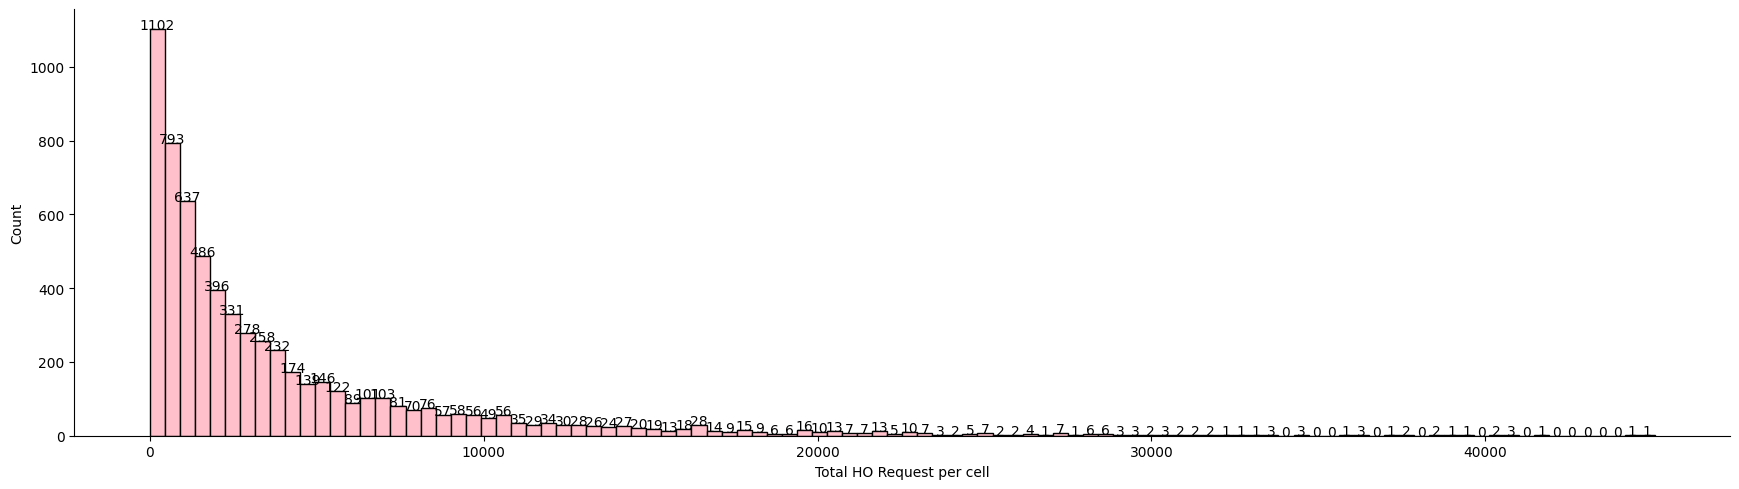

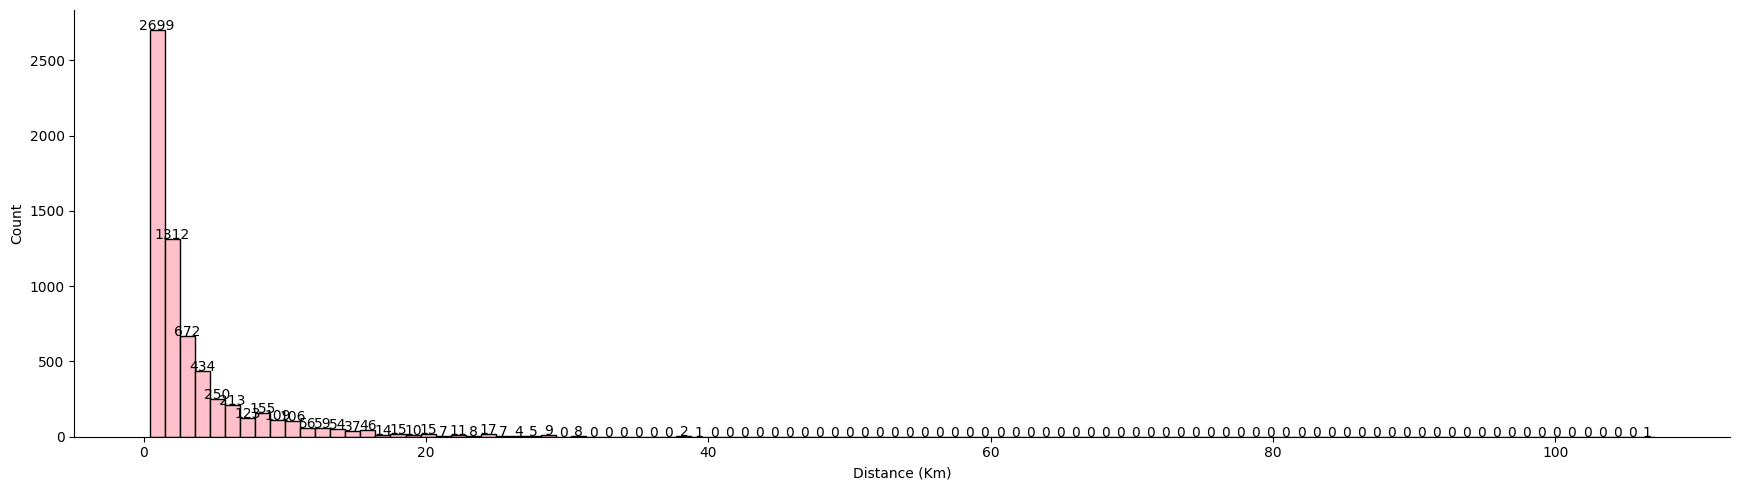

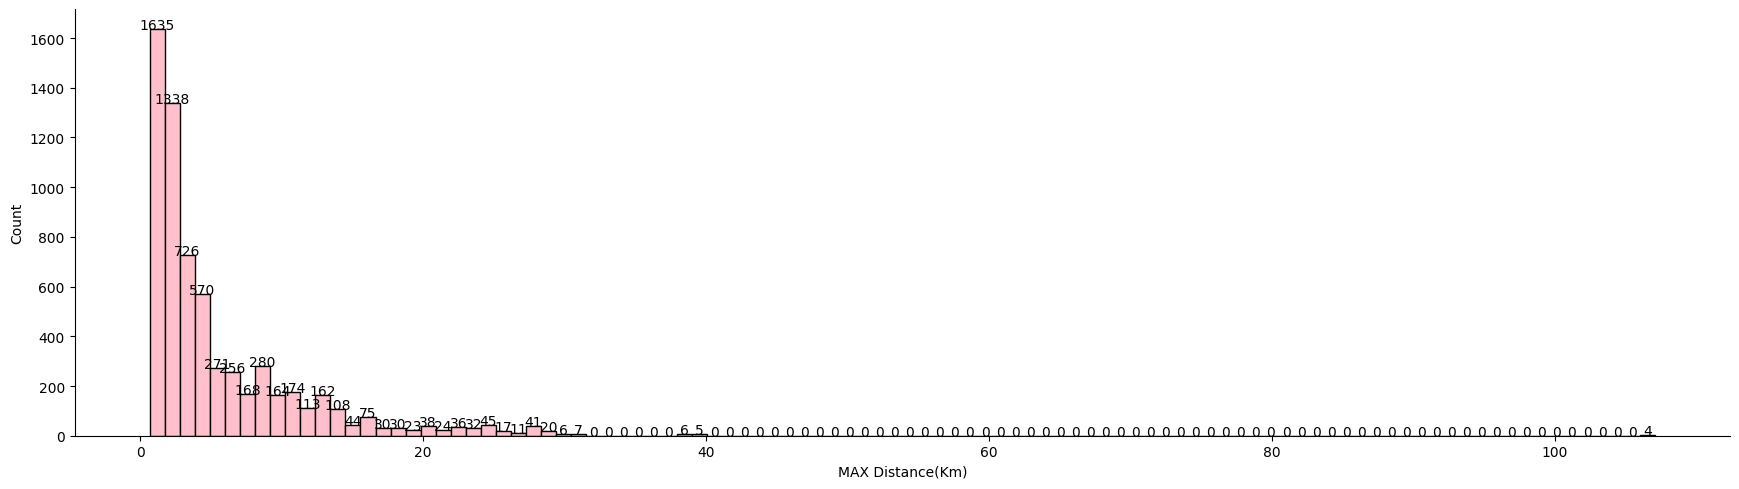

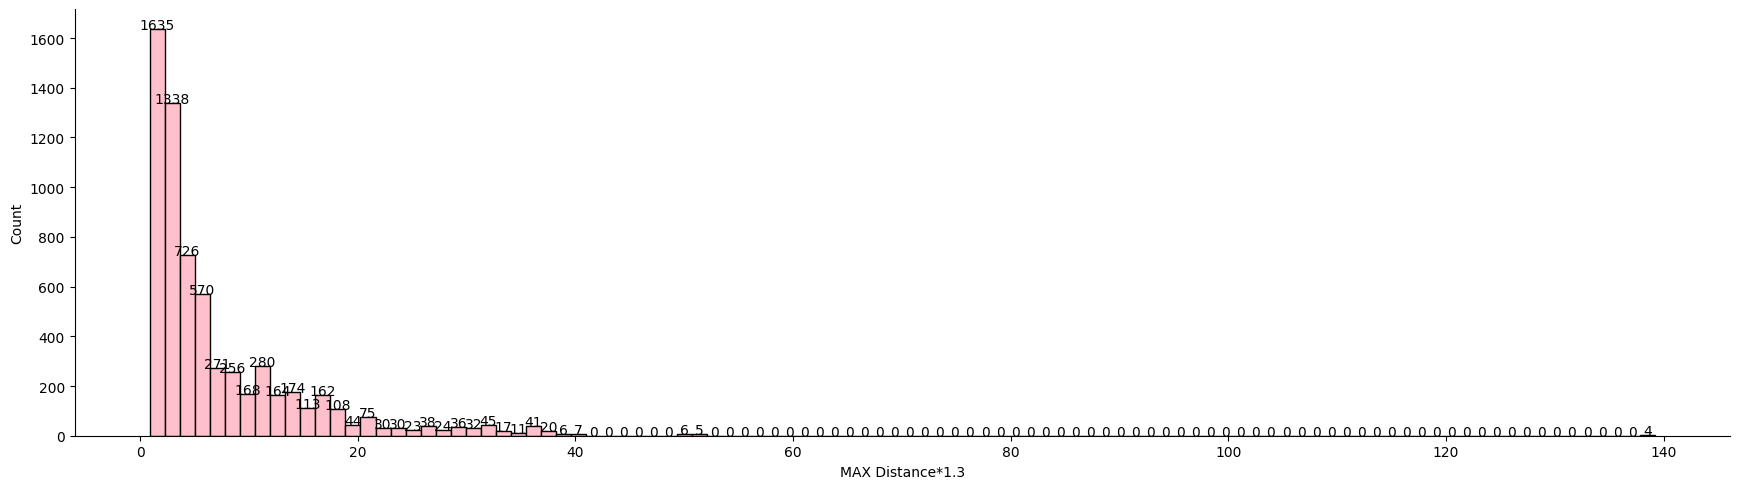

In [64]:
for i in numerical_features:
    bins_cols(i)

### Analysing the difference between LAT and LAT

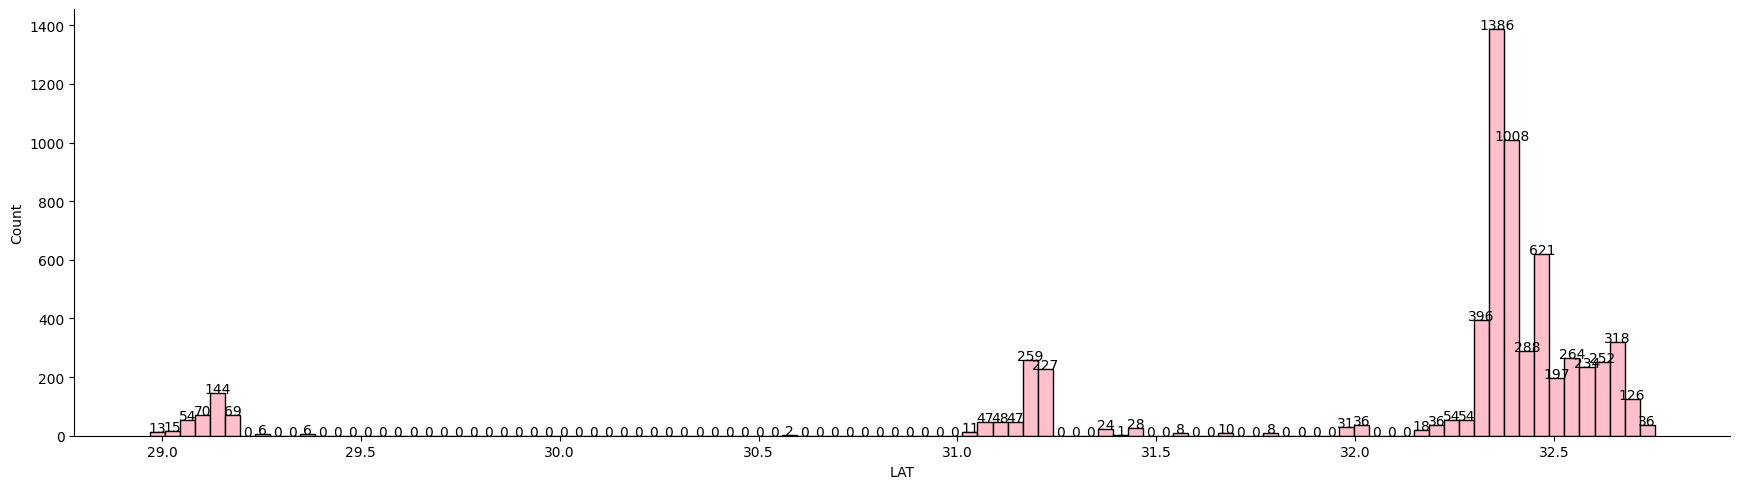

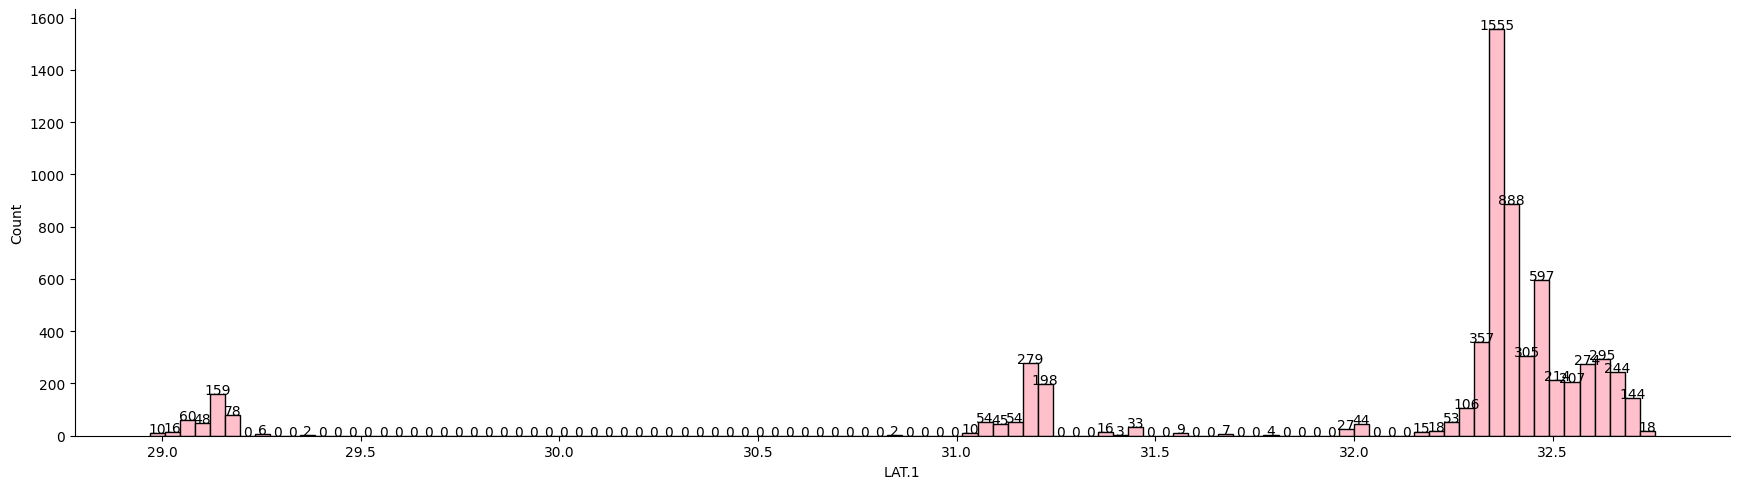

In [65]:
for i in ["LAT","LAT.1"]:
    bins_cols(i)

### Analysing the difference between LONG and LONG

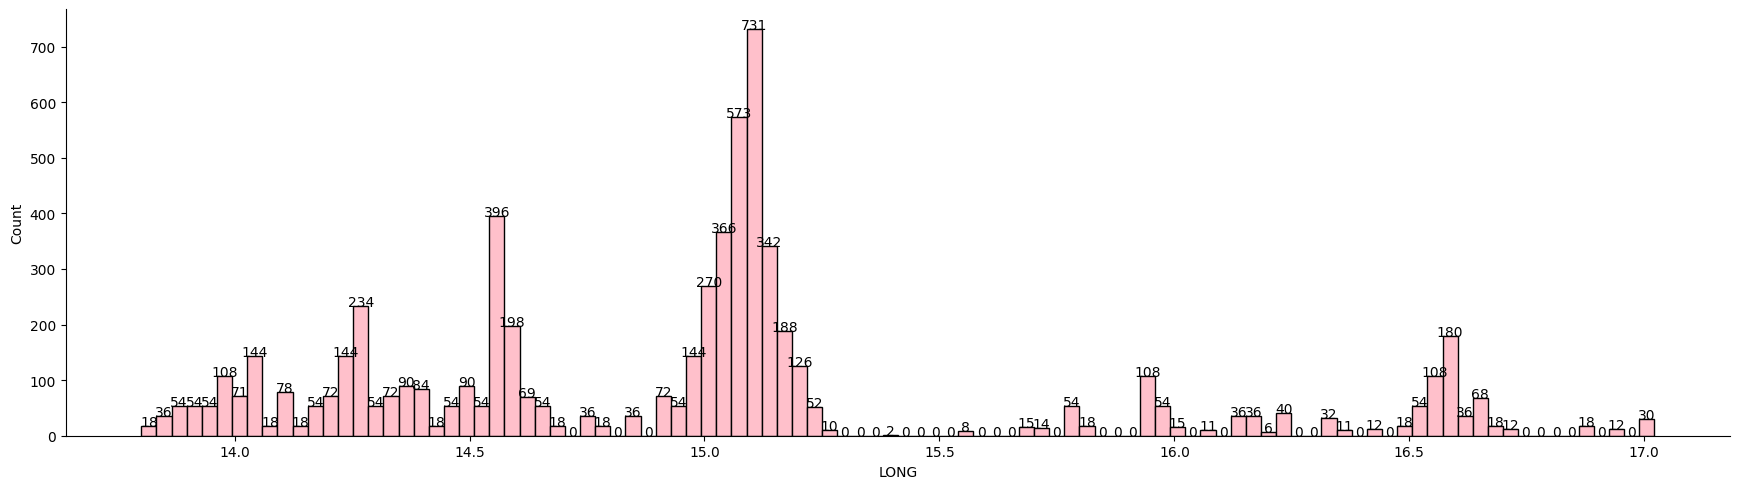

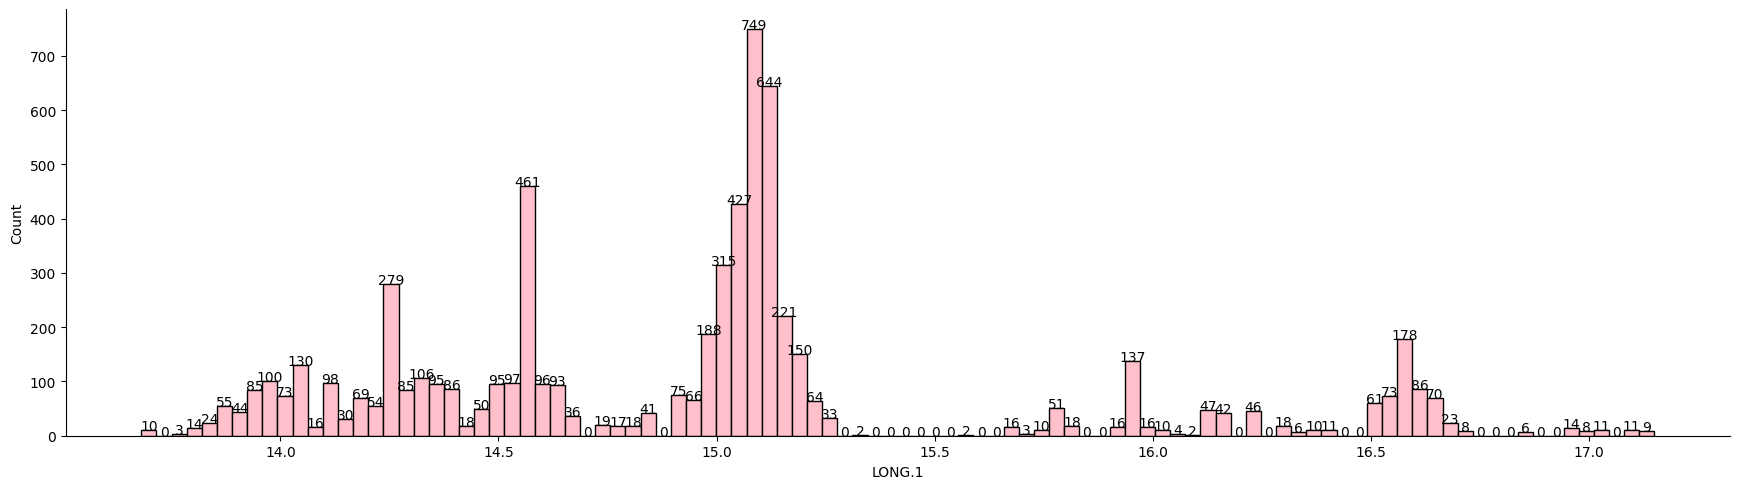

In [66]:
for i in ["LONG","LONG.1"]:
    bins_cols(i)

### Analysing the outliers and the median of the numerical features

<Axes: >

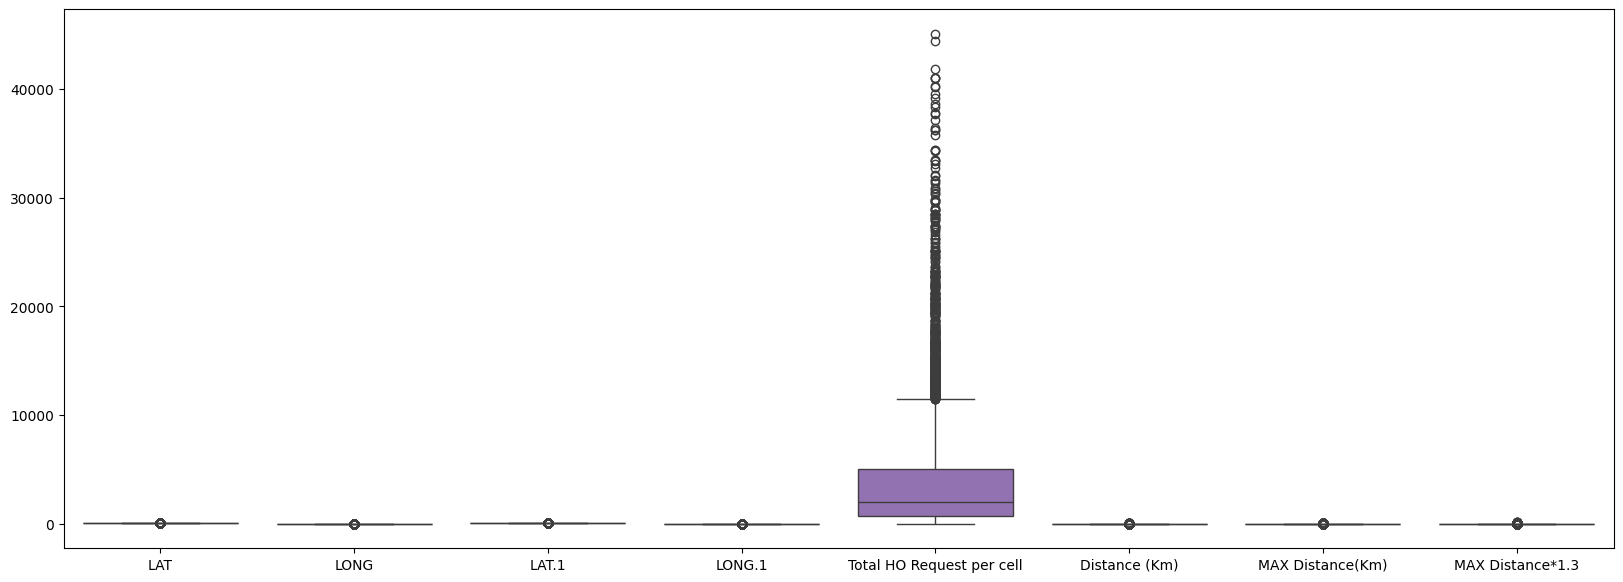

In [67]:
plt.figure(figsize=(20,7))
sns.boxplot(data = df)

## Second Sheet Exploratory Data Analysis
* 2G Overshooting Analysis (Master TA (time advance)s)

GBSC: Global Base Station Controller - Represents the main controller managing multiple Base Transceiver Stations (BTS) within a network.

BTS Name: Base Transceiver Station Name - Identifies a specific BTS within the network.

Region: Denotes the geographical region associated with the BTS.

Cell Name: Identifies a specific cell within the BTS, as a BTS typically contains multiple cells.

Total MRs: Total number of Measurement Reports - Represents the overall count of measurement reports, providing an overview of network activity.

Distance*1.3: A calculated distance metric, possibly adjusted or scaled by a factor of 1.3 for specific analysis or thresholds.

Matched TA:

TAs inside Matched TA%: 

MRs > 15 KM: Measurement Reports exceeding a distance of 15 kilometers - Likely used to identify and analyze signal quality or network performance for devices located farther from the BTS.

In [68]:
df2 = pd.read_excel("2G_Overshooting.xlsx",sheet_name="Master TAs")
df2.head()

,GBSC,BTS Name,Region,Cell Name,MRs(TA0 : TA3),MRs(TA0 : TA3) %,MRs(TA4 : TA7),MRs(TA4 : TA7) %,MRs(TA8 : TA11),MRs(TA8 : TA11) %,...,MRs(TA45 : TA49) %,MRs(TA50: TA54),MRs(TA50 : TA54) %,MRs(TA55: TA63),MRs(TA55 : TA63) %,Total MRs,Distance*1.3,Matched TA,TAs inside Matched TA%,MRs > 15 KM
0,Misrata_BSC01,NAJ04,Middle West,NAJ04B,2051094,89.401075,153780,96.103887,41864,97.928614,...,99.999826,4,100.0,0,100,2294261,NaN,NaN,89.401075,8.011294e-04
1,Misrata_BSC01,MSR08,Middle West,MSR08B,2870013,90.721995,71349,92.977359,135452,97.259039,...,99.999968,1,100.0,0,100,3163525,NaN,NaN,90.721995,3.161031e-07
2,Misrata_BSC01,KHM02,Middle West,KHM02B,1339171,92.624017,83572,98.404290,11288,99.185027,...,100.000000,0,100.0,0,100,1445814,NaN,NaN,92.624017,7.864082e-04
3,Misrata_BSC01,NKH39,Middle West,NKH39A,2681891,92.813802,205575,99.928258,1398,99.976640,...,100.000000,0,100.0,0,100,2889539,NaN,NaN,92.813802,2.249494e-05
4,Misrata_BSC01,NAJ04,Middle West,NAJ04C,7600152,93.792423,488748,99.823995,4395,99.878233,...,100.000000,0,100.0,0,100,8103162,NaN,NaN,93.792423,6.317287e-04


### Column Types

In [69]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   GBSC                    1094 non-null   object 
 1   BTS Name                1094 non-null   object 
 2   Region                  1094 non-null   object 
 3   Cell Name               1094 non-null   object 
 4   MRs(TA0 : TA3)          1094 non-null   int64  
 5   MRs(TA0 : TA3) %        1094 non-null   float64
 6   MRs(TA4 : TA7)          1094 non-null   int64  
 7   MRs(TA4 : TA7) %        1094 non-null   float64
 8   MRs(TA8 : TA11)         1094 non-null   int64  
 9   MRs(TA8 : TA11) %       1094 non-null   float64
 10  MRs(TA12 : TA15)        1094 non-null   int64  
 11  MRs(TA12 : TA15) %      1094 non-null   float64
 12  MRs(TA16 : TA19)        1094 non-null   int64  
 13  MRs(TA16 : TA19) %      1094 non-null   float64
 14  MRs(TA20 : TA23)        1094 non-null   

### Extracting only the numerical variables

In [70]:
numerical_features2 = df2.select_dtypes(include=['float64','int64'])
numerical_features2

,MRs(TA0 : TA3),MRs(TA0 : TA3) %,MRs(TA4 : TA7),MRs(TA4 : TA7) %,MRs(TA8 : TA11),MRs(TA8 : TA11) %,MRs(TA12 : TA15),MRs(TA12 : TA15) %,MRs(TA16 : TA19),MRs(TA16 : TA19) %,...,MRs(TA45 : TA49) %,MRs(TA50: TA54),MRs(TA50 : TA54) %,MRs(TA55: TA63),MRs(TA55 : TA63) %,Total MRs,Distance*1.3,Matched TA,TAs inside Matched TA%,MRs > 15 KM
0,2051094,89.401075,153780,96.103887,41864,97.928614,23505,98.953127,15198,99.615562,...,99.999826,4,100.000000,0,100,2294261,NaN,NaN,89.401075,8.011294e-04
1,2870013,90.721995,71349,92.977359,135452,97.259039,86610,99.996807,99,99.999937,...,99.999968,1,100.000000,0,100,3163525,NaN,NaN,90.721995,3.161031e-07
2,1339171,92.624017,83572,98.404290,11288,99.185027,3518,99.428350,6051,99.846868,...,100.000000,0,100.000000,0,100,1445814,NaN,NaN,92.624017,7.864082e-04
3,2681891,92.813802,205575,99.928258,1398,99.976640,254,99.985430,352,99.997612,...,100.000000,0,100.000000,0,100,2889539,NaN,NaN,92.813802,2.249494e-05
4,7600152,93.792423,488748,99.823995,4395,99.878233,1440,99.896004,1159,99.910307,...,100.000000,0,100.000000,0,100,8103162,NaN,NaN,93.792423,6.317287e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,5189046,96.526796,185415,99.975892,1293,99.999944,3,100.000000,0,100.000000,...,100.000000,0,100.000000,0,100,5375757,NaN,NaN,99.999944,0.000000e+00
1090,2783726,77.606464,780170,99.356533,23079,99.999944,1,99.999972,1,100.000000,...,100.000000,0,100.000000,0,100,3586977,NaN,NaN,99.999944,0.000000e+00
1091,12765366,96.654385,435694,99.953291,6164,99.999962,3,99.999985,1,99.999992,...,100.000000,0,100.000000,0,100,13207229,NaN,NaN,99.999962,7.571611e-08
1092,12809235,99.435026,71830,99.992625,949,99.999992,0,99.999992,0,99.999992,...,99.999992,0,99.999992,1,100,12882015,NaN,NaN,99.999992,7.762761e-08


### Statistical Overview

In [71]:
numerical_features2.describe()

,MRs(TA0 : TA3),MRs(TA0 : TA3) %,MRs(TA4 : TA7),MRs(TA4 : TA7) %,MRs(TA8 : TA11),MRs(TA8 : TA11) %,MRs(TA12 : TA15),MRs(TA12 : TA15) %,MRs(TA16 : TA19),MRs(TA16 : TA19) %,...,MRs(TA45 : TA49) %,MRs(TA50: TA54),MRs(TA50 : TA54) %,MRs(TA55: TA63),MRs(TA55 : TA63) %,Total MRs,Distance*1.3,Matched TA,TAs inside Matched TA%,MRs > 15 KM
count,1.094000e+03,1094.000000,1.094000e+03,1094.000000,1.094000e+03,1094.000000,1.094000e+03,1094.000000,1.094000e+03,1094.000000,...,1094.000000,1094.000000,1094.000000,1094.00000,1094.0,1.094000e+03,0.0,0.0,1094.000000,1.094000e+03
mean,5.087335e+06,79.639446,9.214634e+05,92.735888,2.207771e+05,96.425693,7.961498e+04,97.933341,3.941669e+04,98.741990,...,99.959396,677.821755,99.981011,634.12340,100.0,6.394716e+06,NaN,NaN,99.267011,4.787240e-03
std,3.861920e+06,27.230951,1.640731e+06,15.561284,5.386792e+05,10.146374,2.512795e+05,7.038364,1.487488e+05,5.064711,...,0.343582,7156.153059,0.163404,6885.44511,0.0,4.401306e+06,NaN,NaN,3.067344,2.485100e-02
min,4.789000e+03,2.417280,9.000000e+00,10.565014,0.000000e+00,29.978024,0.000000e+00,41.902175,0.000000e+00,52.144455,...,93.323324,0.000000,97.283361,0.00000,100.0,7.542600e+04,NaN,NaN,51.985561,0.000000e+00
25%,2.382086e+06,65.086478,1.474325e+04,94.766690,2.425000e+02,98.902390,2.000000e+00,99.697135,0.000000e+00,99.889875,...,100.000000,0.000000,100.000000,0.00000,100.0,3.197598e+06,NaN,NaN,99.649756,0.000000e+00
50%,4.238978e+06,95.102053,1.702610e+05,99.743554,8.472500e+03,99.958390,9.910000e+02,99.991969,1.455000e+02,99.998868,...,100.000000,0.000000,100.000000,0.00000,100.0,5.343337e+06,NaN,NaN,99.941242,1.226082e-07
75%,6.986746e+06,99.620733,1.034525e+06,99.992451,1.683208e+05,99.999619,3.154175e+04,99.999983,7.700250e+03,100.000000,...,100.000000,0.000000,100.000000,0.00000,100.0,8.536594e+06,NaN,NaN,99.995402,1.388826e-04
max,2.405982e+07,99.999511,1.289597e+07,100.000000,5.352648e+06,100.000000,2.723394e+06,100.000000,2.360448e+06,100.000000,...,100.000000,193426.000000,100.000000,182704.00000,100.0,2.757467e+07,NaN,NaN,100.000000,3.001009e-01


### Null Values in each column

In [72]:
numerical_features2.isnull().sum()

MRs(TA0 : TA3)               0
MRs(TA0 : TA3) %             0
MRs(TA4 : TA7)               0
MRs(TA4 : TA7) %             0
MRs(TA8 : TA11)              0
MRs(TA8 : TA11) %            0
MRs(TA12 : TA15)             0
MRs(TA12 : TA15) %           0
MRs(TA16 : TA19)             0
MRs(TA16 : TA19) %           0
MRs(TA20 : TA23)             0
MRs(TA20 : TA23) %           0
MRs(TA24 : TA27)             0
MRs(TA24 : TA27) %           0
MRs(TA28 : TA33)             0
MRs(TA28 : TA33) %           0
MRs(TA34 : TA39)             0
MRs(TA34 : TA39) %           0
MRs(TA40: TA44)              0
MRs(TA40 : TA44) %           0
MRs(TA45: TA49)              0
MRs(TA45 : TA49) %           0
MRs(TA50: TA54)              0
MRs(TA50 : TA54) %           0
MRs(TA55: TA63)              0
MRs(TA55 : TA63) %           0
Total MRs                    0
Distance*1.3              1094
Matched TA                1094
TAs inside Matched TA%       0
MRs > 15 KM                  0
dtype: int64

### Data Destribution

In [73]:
# Filtering Columns 
empty_cols = ['Distance*1.3','Matched TA']
not_percentage_columns = [col for col in numerical_features2.columns if not col.endswith("%")]
not_percentage_columns

['MRs(TA0 : TA3)',
 'MRs(TA4 : TA7)',
 'MRs(TA8 : TA11)',
 'MRs(TA12 : TA15)',
 'MRs(TA16 : TA19)',
 'MRs(TA20 : TA23)',
 'MRs(TA24 : TA27)',
 'MRs(TA28 : TA33)',
 'MRs(TA34 : TA39)',
 'MRs(TA40: TA44)',
 'MRs(TA45: TA49)',
 'MRs(TA50: TA54)',
 'MRs(TA55: TA63)',
 'Total MRs',
 'Distance*1.3',
 'Matched TA',
 'MRs > 15 KM']

In [113]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   GBSC                    1094 non-null   object 
 1   BTS Name                1094 non-null   object 
 2   Region                  1094 non-null   object 
 3   Cell Name               1094 non-null   object 
 4   MRs(TA0 : TA3)          1094 non-null   int64  
 5   MRs(TA0 : TA3) %        1094 non-null   float64
 6   MRs(TA4 : TA7)          1094 non-null   int64  
 7   MRs(TA4 : TA7) %        1094 non-null   float64
 8   MRs(TA8 : TA11)         1094 non-null   int64  
 9   MRs(TA8 : TA11) %       1094 non-null   float64
 10  MRs(TA12 : TA15)        1094 non-null   int64  
 11  MRs(TA12 : TA15) %      1094 non-null   float64
 12  MRs(TA16 : TA19)        1094 non-null   int64  
 13  MRs(TA16 : TA19) %      1094 non-null   float64
 14  MRs(TA20 : TA23)        1094 non-null   

### Data Distribution

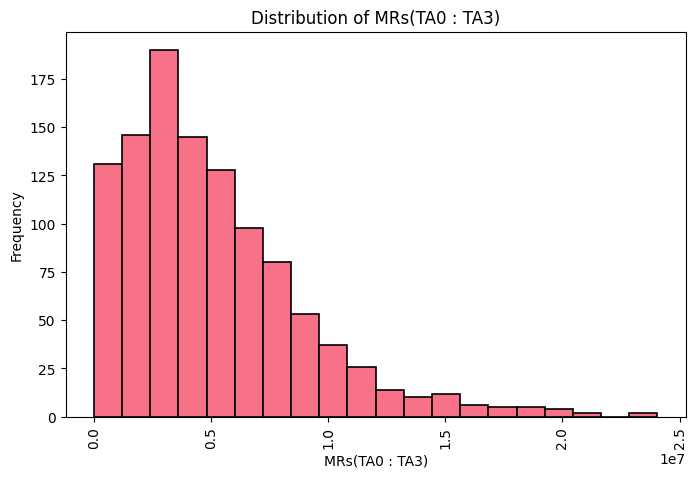

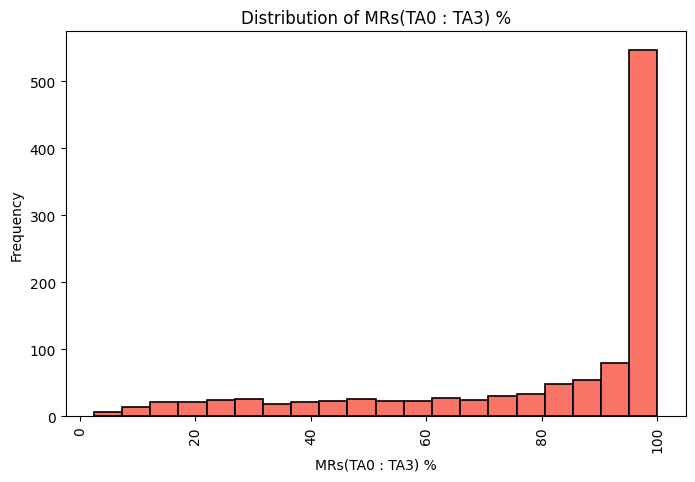

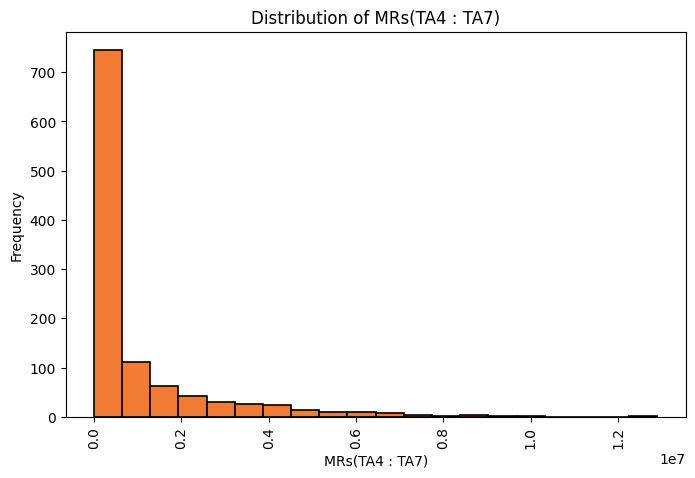

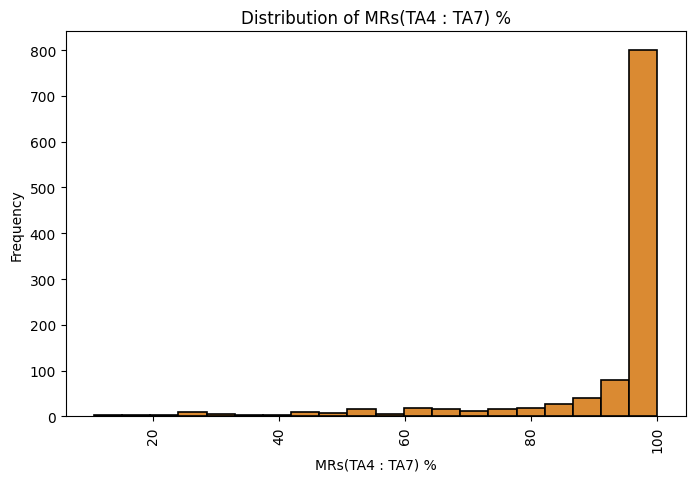

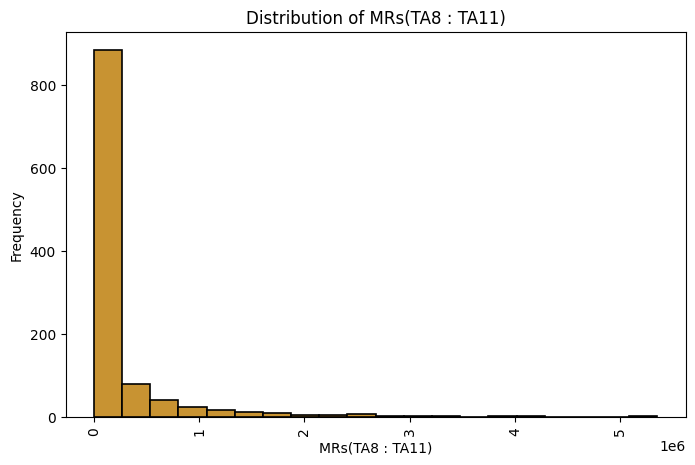

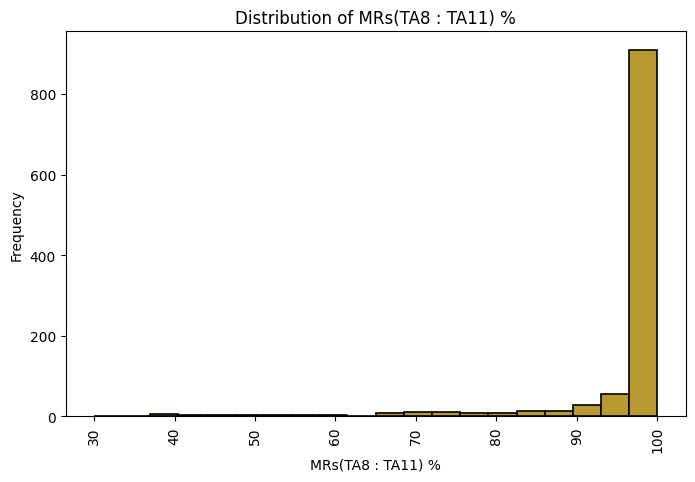

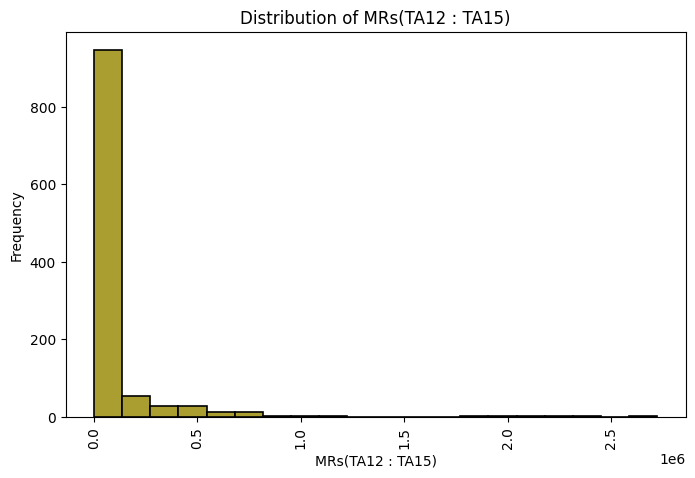

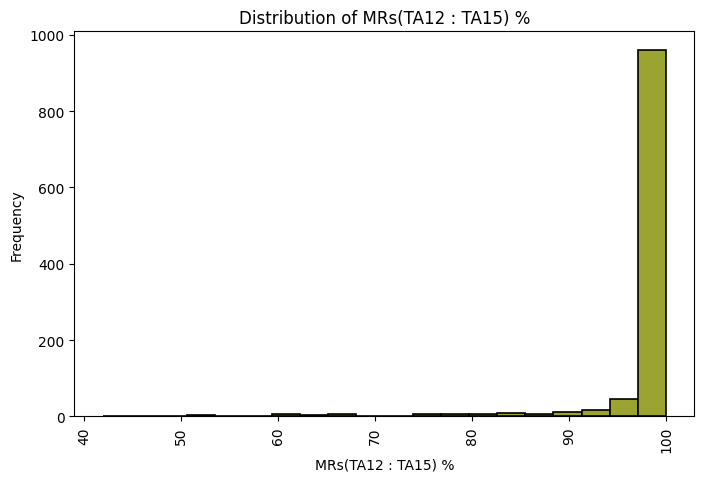

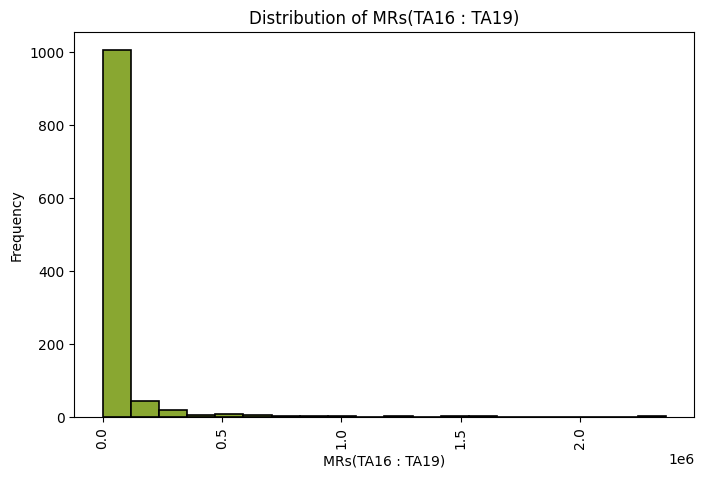

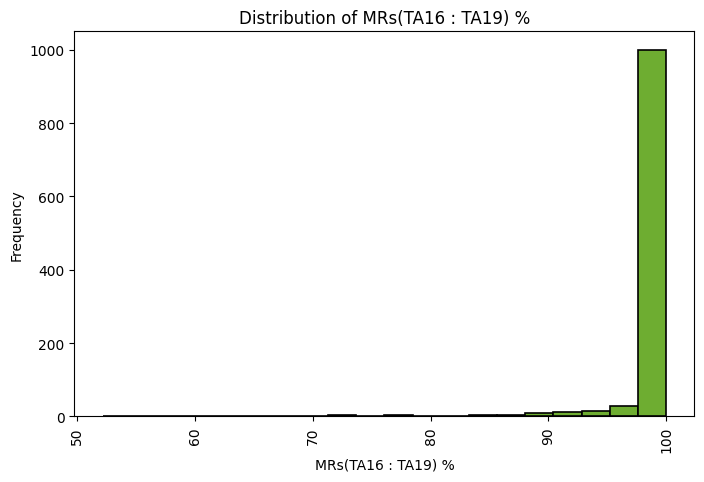

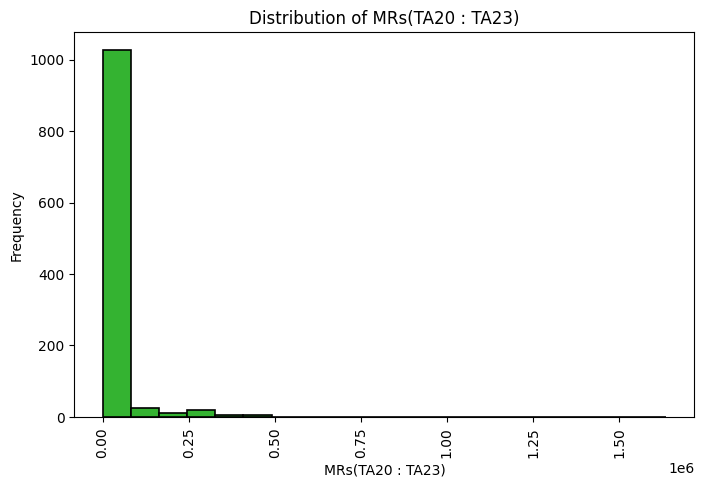

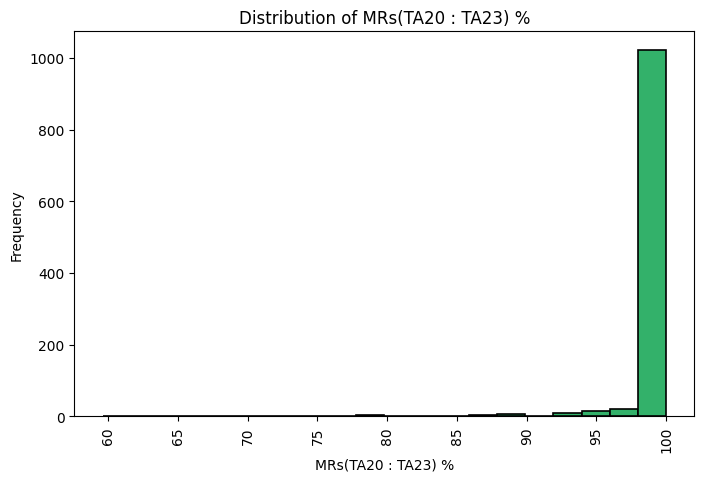

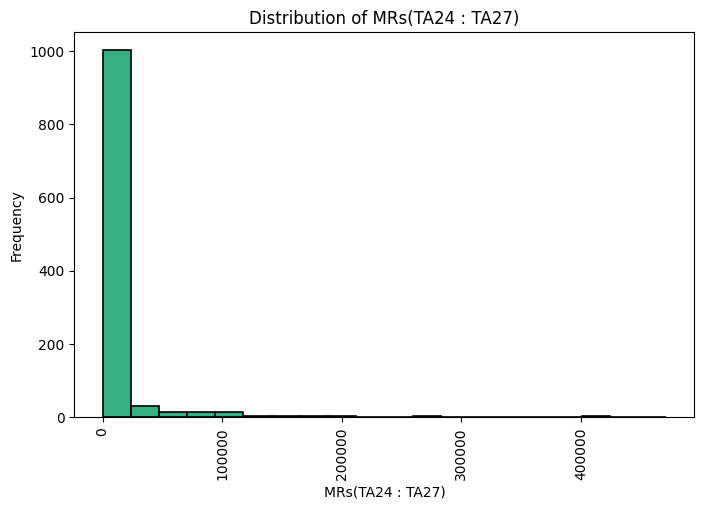

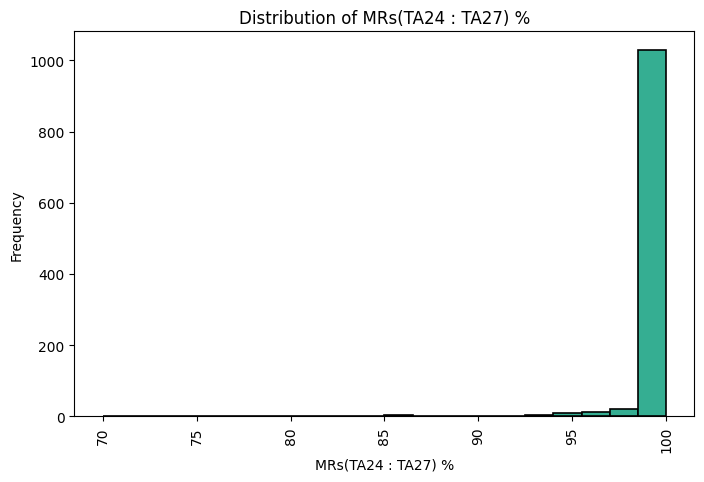

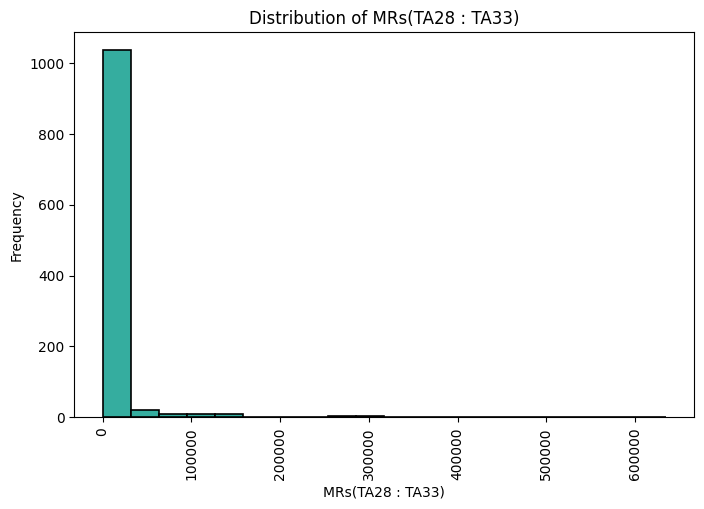

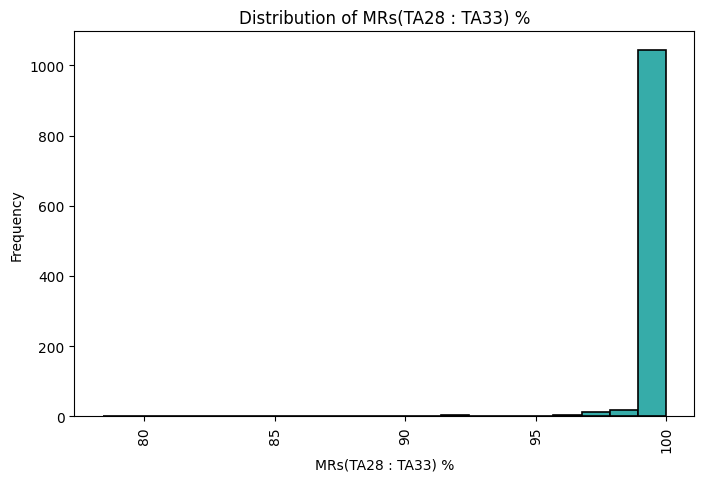

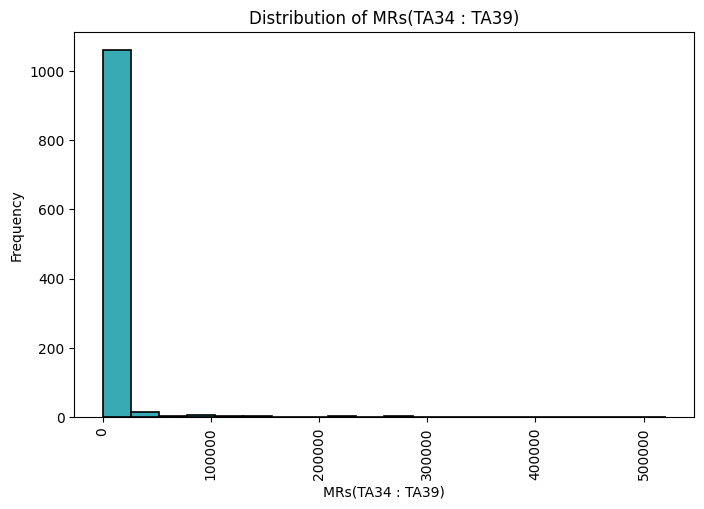

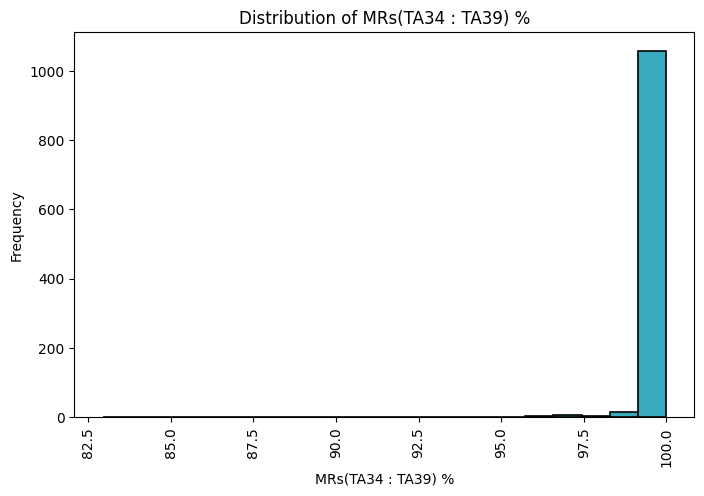

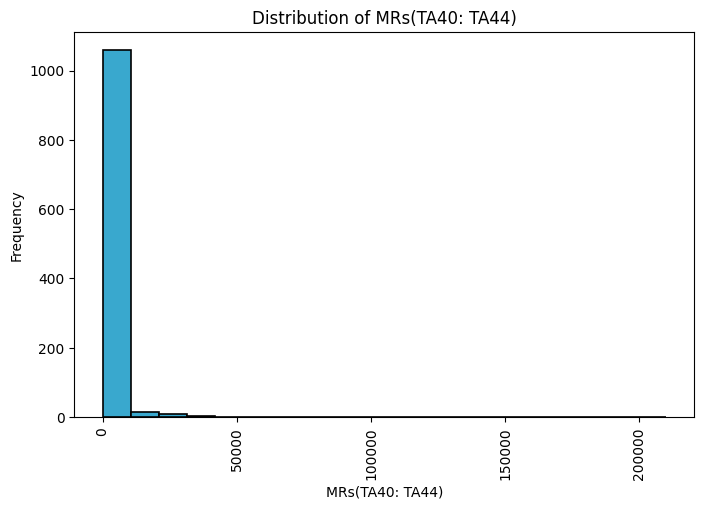

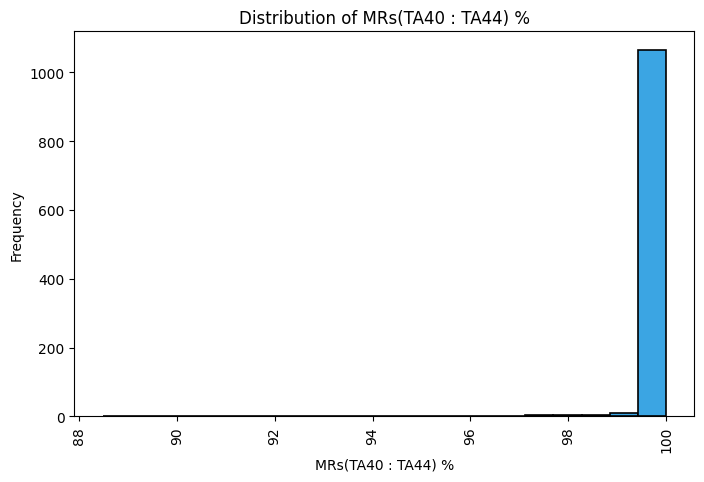

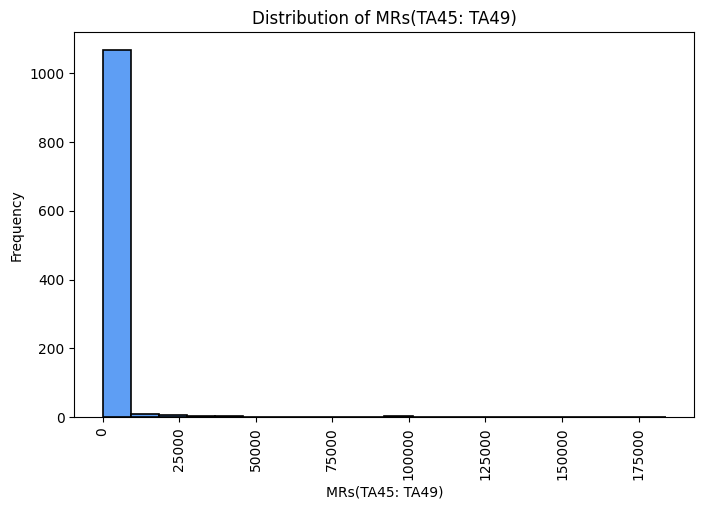

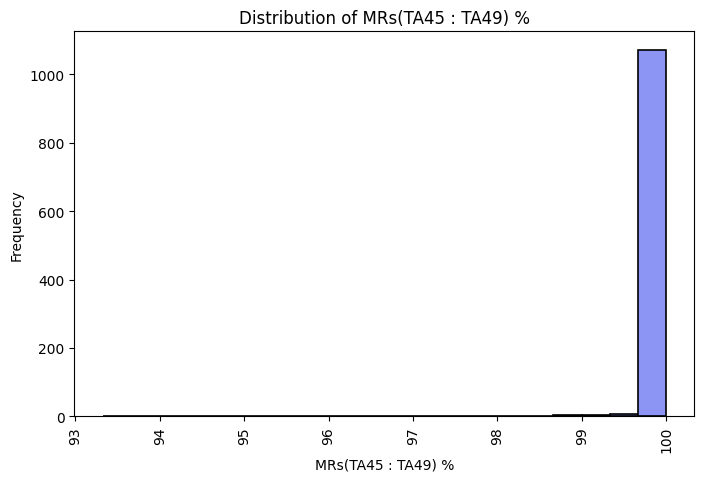

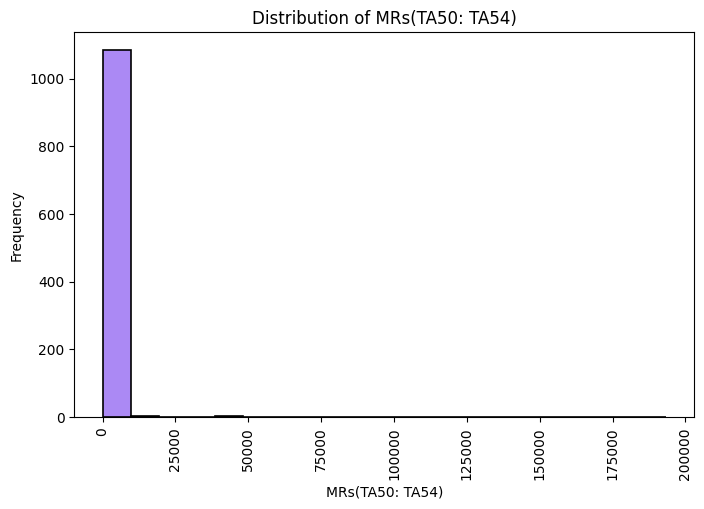

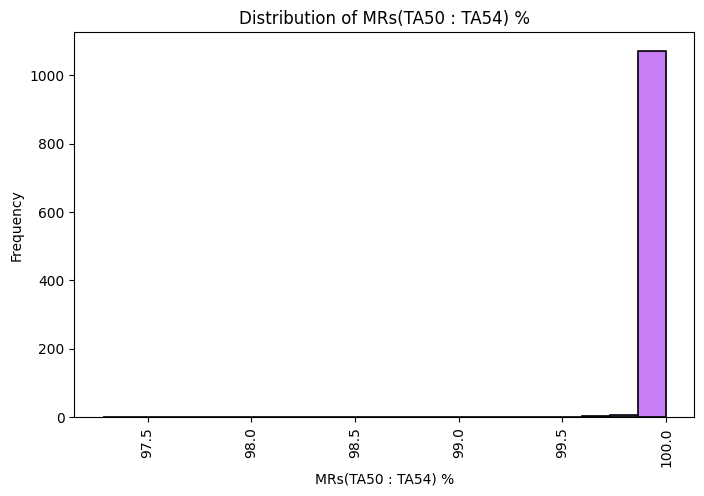

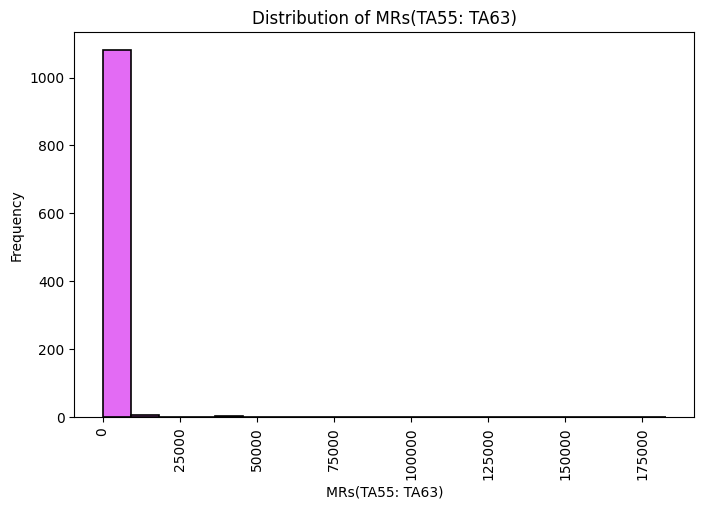

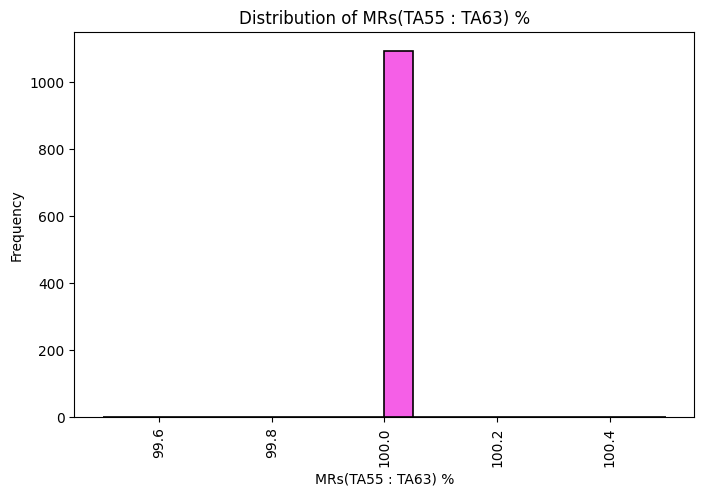

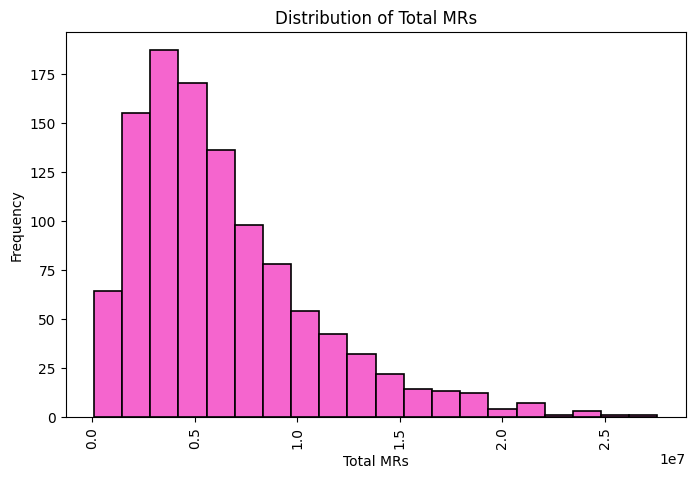

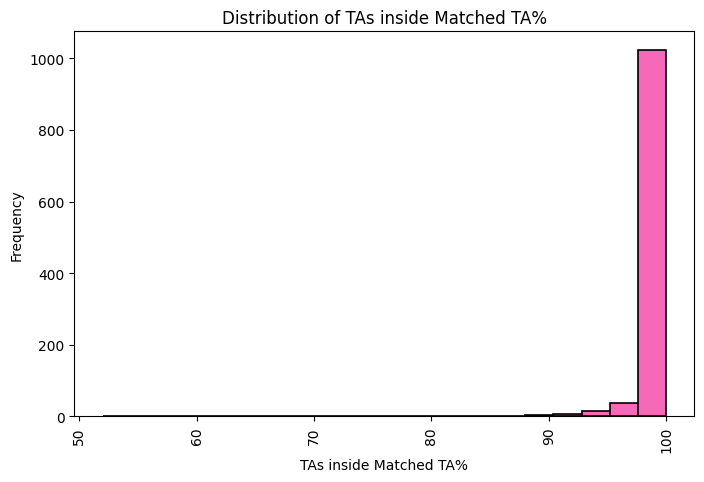

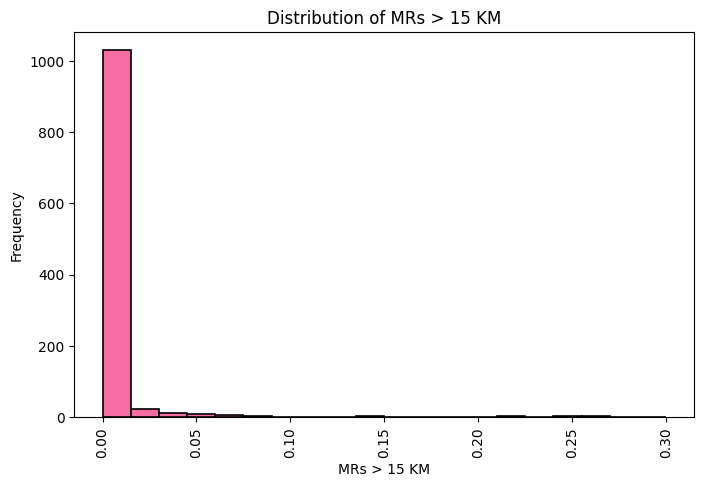

In [115]:
colors = sns.color_palette("husl", len(df2.columns.drop(['GBSC', 'BTS Name', 'Region', 'Cell Name', 'Distance*1.3', 'Matched TA'])))
for i, col in enumerate(df2.columns.drop(['GBSC', 'BTS Name', 'Region', 'Cell Name', 'Distance*1.3', 'Matched TA'])):
    plt.figure(figsize=(8, 5))
    plt.hist(df2[col], bins=20, color=colors[i], edgecolor='black', linewidth=1.2)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()

### Displaying the Most correlated features

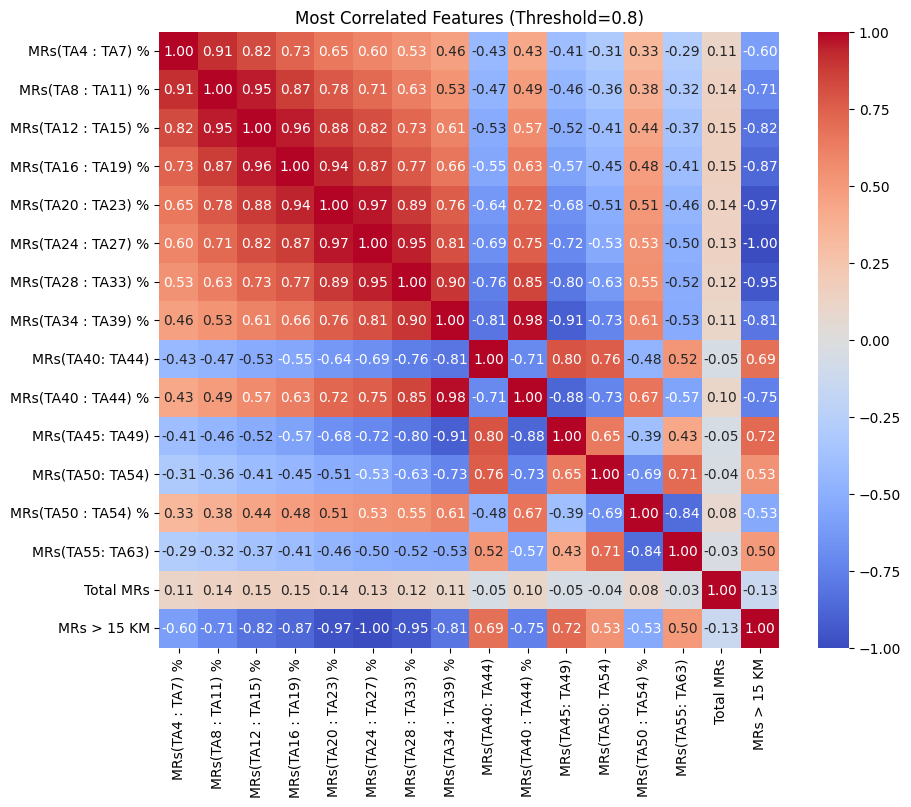

In [ ]:
def display_most_correlated_features(dataframe, threshold=0.8):
    corr_matrix = dataframe.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    most_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    plt.figure(figsize=(10, 8))
    sns.heatmap(dataframe[most_correlated_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Most Correlated Features (Threshold={threshold})')
    plt.show()
display_most_correlated_features(numerical_features2, threshold=0.8)

## Third Sheet Exploratory Data Analysis
* 2G Overshooting Analysis (Violated Cells)

BSC: Base Station Controller - Controlls multiple BTS, handles handovers and frequency hopping

Region: Denotes the geographical region associated with the specific cellular network configuration.

Cell Name: Identifies a specific cell within the network. A cell is the basic geographic unit in a cellular network, and each cell is served by a Base Transceiver Station (BTS).

Matched TA: Matched Time Advance

TAs inside Matched TA%: 

MRs > 15 KM %: Percentage representation of Measurement Reports (MRs) exceeding a distance of 15 kilometers. It indicates the proportion of MRs where the reported signal transmission distance is beyond the specified threshold.

Comment: Detecting wether a cell is violated or not

Proposal action: Proposed actions, wether a tilt action is required or not

In [74]:
df3 = pd.read_excel("2G_Overshooting.xlsx",sheet_name="Violated cells")
df3.head()

,BSC,Region,Cell Name,Matched TA,TAs inside Matched TA %,MRs > 15 KM %,Comment,Proposal action
0,Misrata_BSC01,Middle West,NAJ03B,MRs(TA24 : TA27),86.112974,0.138870,Violated,Cell serving in open area
1,Misrata_BSC01,Middle West,NAJ04B,MRs(TA0 : TA3),89.401075,0.000801,Violated,Tilt Action Required
2,Misrata_BSC01,Middle West,NKH37C,MRs(TA4 : TA7),89.925419,0.016899,Violated,Tilt Action Required
3,Misrata_BSC01,Middle West,PH983B,MRs(TA16 : TA19),54.880094,0.300101,Violated,Cell serving in open area
4,Misrata_BSC01,Middle West,PHB66B,MRs(TA12 : TA15),51.985561,0.247644,Violated,Cell serving in open area


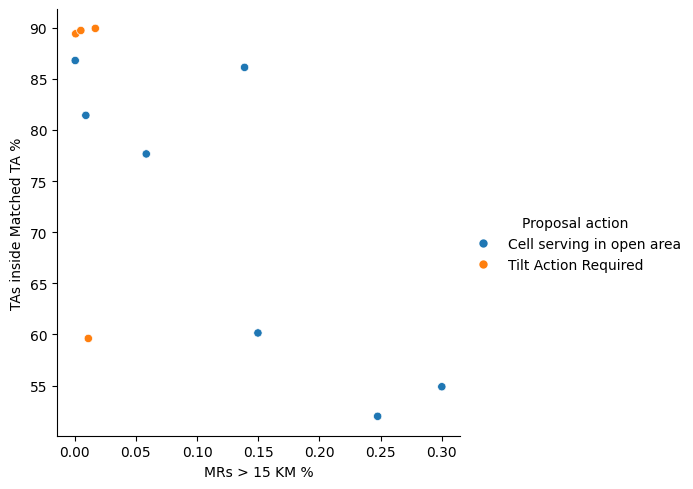

In [75]:
sns.relplot(data=df3, x="MRs > 15 KM %", y="TAs inside Matched TA %", hue="Proposal action")

### Column Types

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BSC                      11 non-null     object 
 1   Region                   11 non-null     object 
 2   Cell Name                11 non-null     object 
 3   Matched TA               11 non-null     object 
 4   TAs inside Matched TA %  11 non-null     float64
 5   MRs > 15 KM %            11 non-null     float64
 6   Comment                  11 non-null     object 
 7   Proposal action          11 non-null     object 
dtypes: float64(2), object(6)
memory usage: 832.0+ bytes


### Statistical Overview

In [ ]:
df3.describe()

,TAs inside Matched TA %,MRs > 15 KM %
count,11.000000,11.000000
mean,75.238367,0.085313
std,15.327252,0.108165
min,51.985561,0.000457
25%,59.871136,0.007082
50%,81.420148,0.016899
75%,88.092817,0.144335
max,89.925419,0.300101


### Relationship between MRs > 15 KM % , TA inside Matched TA % and Proposal Solution

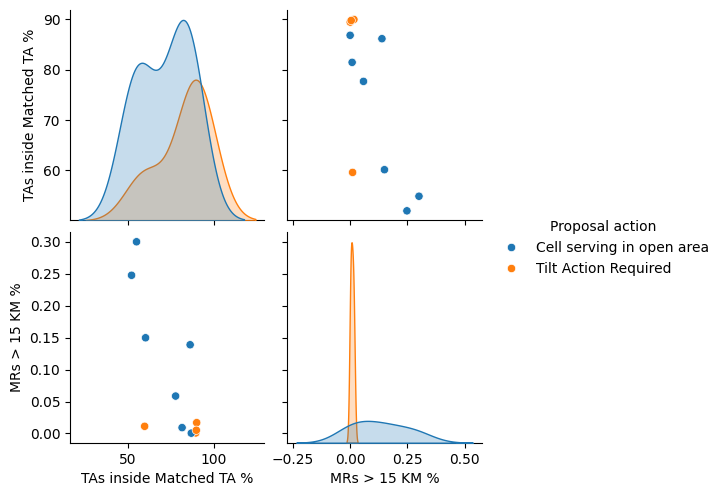

In [ ]:
sns.pairplot(df3, hue="Proposal action")

Label Encoding of Proposal action to get the correlation

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df3['Proposal action']= label_encoder.fit_transform(df3['Proposal action'])
df3['Proposal action'].unique()

array([0, 1])

0 : Cell serving in open area

1 : Tilt Action Required

### Extracting Numerical Features (Columns)

In [ ]:
numerical_features3 = df3.select_dtypes(include=['float64','int64','int32'])
numerical_features3

,TAs inside Matched TA %,MRs > 15 KM %,Proposal action
0,86.112974,0.138870,0
1,89.401075,0.000801,1
2,89.925419,0.016899,1
3,54.880094,0.300101,0
4,51.985561,0.247644,0
5,60.140156,0.149799,0
6,81.420148,0.009125,0
7,86.784558,0.000457,0
8,77.648488,0.058531,0
9,89.721445,0.005039,1


### Correlation Matrix (Column Dependencies)

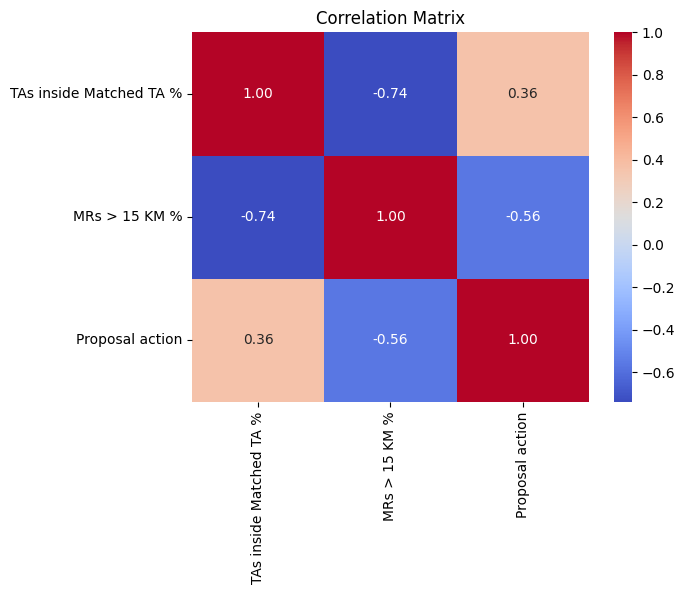

In [ ]:
sns.heatmap(numerical_features3.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Data Destribution

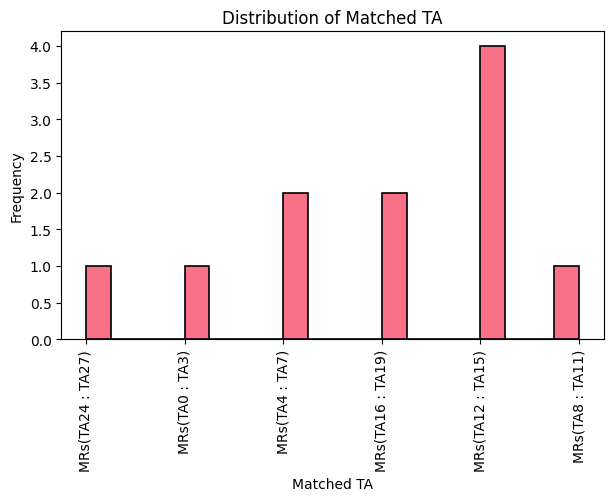

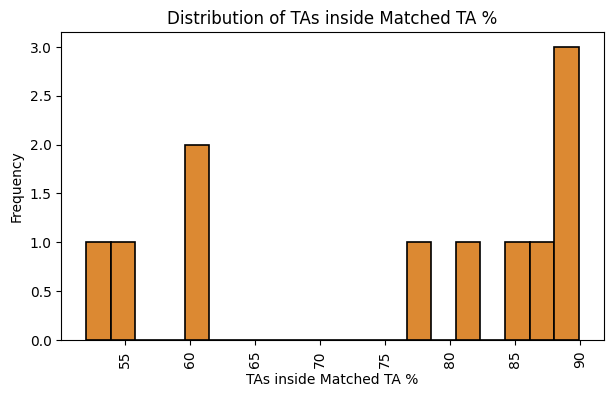

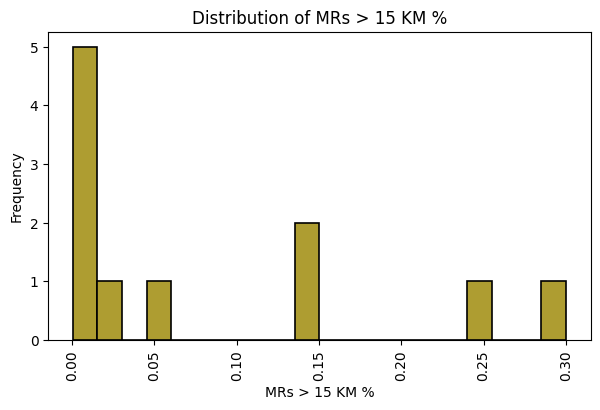

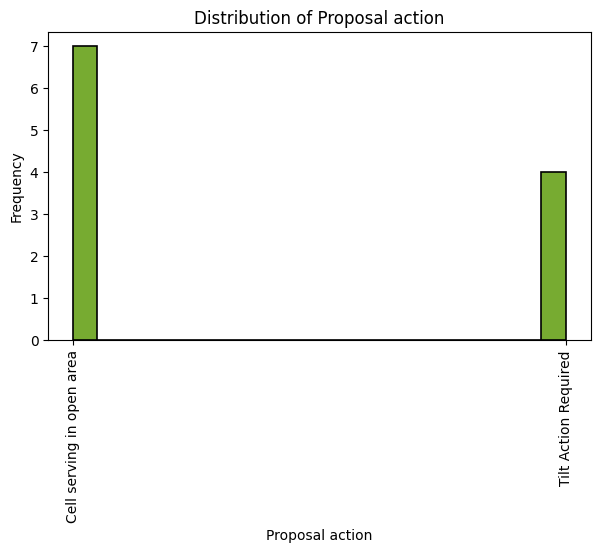

In [83]:
for i, col in enumerate(df3.drop(['BSC','Region','Cell Name','Comment'], axis = 1)):
    plt.figure(figsize=(7, 4))
    plt.hist(df3[col], bins=20, color=colors[i], edgecolor='black', linewidth=1.2)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()

### TA inside matched TA % distribution 

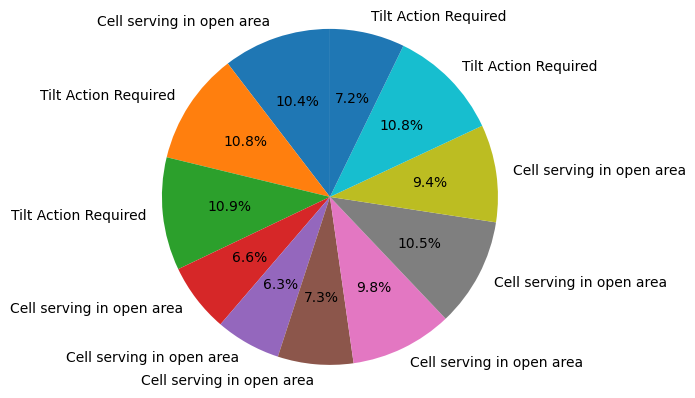

In [105]:
fig1, ax1 = plt.subplots()
ax1.pie(df3["TAs inside Matched TA %"], labels=df3["Proposal action"], autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')
plt.show()